# Onderzoeksobjectief 1: Het vaststellen van de impact van CTA’s op het aantal comments

CTA’s worden vaak ingezet om de betrokkenheid van kijkers te verhogen. Eerder onderzoek toont aan dat expliciete oproepen om te reageren kunnen leiden tot een stijging in het aantal comments (Cheng et al., 2021; Gu, 2024). Tur-Viñes en Castelló-Martínez (2019) stellen dat gebruikers vaker geneigd zijn om te reageren wanneer de content creator hen hier expliciet toe aanzet.

De effectiviteit van een CTA is echter afhankelijk van verschillende factoren. Zo benadrukken Muchardie et al. (2016) dat de oproep voldoende duidelijk en aantrekkelijk moet zijn om passieve gebruikers te converteren naar actieve participanten. Bovendien speelt niet alleen de aanwezigheid van een CTA een rol, maar ook kenmerken van de video zelf, zoals de inhoud en presentatie (Cahyani, 2023; Hong et al., 2021).

Dit onderzoeksobjectief onderzoekt in hoeverre een expliciete CTA binnen Nederlandstalige, educatieve YouTube-video’s bijdraagt aan een toename in het aantal comments.

**Onderzoeksvraag: In welke mate verhoogt een expliciete CTA het aantal comments op een YouTube-video?**


In [137]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from cliffs_delta import cliffs_delta

In [2]:
# Get the data from the previous step
exp_videos = pd.read_excel('../output/exp_videos.xlsx')

## Data Exploratie

In [3]:
# Sample data
exp_videos.head()

,id,title,publish_date,duration,views,likes,dislikes,shares,comments,engagement,...,engagement_rate_1w,engagement_rate_2w,engagement_rate_1m,engagement_rate_2m,engagement_rate_3m,has_CTA,is_beta,university,gender,has_ambassador
0,GYtUhykvOos,Is het erg als tieners bijna nooit met vriende...,2024-12-01T07:00:09Z,10:59,4359,101,2,51,13,3.74,...,4.40,4.29,4.11,3.81,3.66,False,NaN,KUL,0,True
1,PkmUT16Um_0,Hoe kan je helpen als je buur ernstig ziek is?...,2024-12-08T09:00:27Z,16:15,2021,37,0,30,3,3.46,...,4.62,4.16,4.02,3.25,3.43,True,0.0,VUB,0,True
2,JxWT-zYtcGg,Hoe zorgt Trump ervoor dat we minder eenzaam z...,2024-12-10T06:00:16Z,17:01,2254,40,5,23,2,2.66,...,2.61,2.60,2.89,2.87,2.74,True,0.0,UA,0,False
3,rJbiY3S69ek,Hoe kan je tijdens een superleuke vakantie toc...,2024-12-15T09:00:48Z,16:27,1263,23,1,26,1,3.88,...,5.64,5.38,5.17,4.79,4.51,False,NaN,VUB,0,False
4,ewUjvz3nDj4,Waarom is een vlam niet vierkant? #dww24,2024-12-17T09:00:40Z,16:46,2123,45,2,28,4,3.53,...,4.11,4.06,3.82,3.74,3.72,True,1.0,UG,1,False


In [4]:
# Check number of rows and columns
exp_videos.shape

(11, 51)

In [5]:
# Check data types for each column
exp_videos.dtypes

id                      object
title                   object
publish_date            object
duration                object
views                    int64
likes                    int64
dislikes                 int64
shares                   int64
comments                 int64
engagement             float64
views_24h                int64
views_1w                 int64
views_2w                 int64
views_1m                 int64
views_2m                 int64
views_3m                 int64
likes_24h                int64
likes_1w                 int64
likes_2w                 int64
likes_1m                 int64
likes_2m                 int64
likes_3m                 int64
dislikes_24h             int64
dislikes_1w              int64
dislikes_2w              int64
dislikes_1m              int64
dislikes_2m              int64
dislikes_3m              int64
shares_24h               int64
shares_1w                int64
shares_2w                int64
shares_1m                int64
shares_2

In [6]:
# Check for missing values
exp_videos.isnull().sum()

id                     0
title                  0
publish_date           0
duration               0
views                  0
likes                  0
dislikes               0
shares                 0
comments               0
engagement             0
views_24h              0
views_1w               0
views_2w               0
views_1m               0
views_2m               0
views_3m               0
likes_24h              0
likes_1w               0
likes_2w               0
likes_1m               0
likes_2m               0
likes_3m               0
dislikes_24h           0
dislikes_1w            0
dislikes_2w            0
dislikes_1m            0
dislikes_2m            0
dislikes_3m            0
shares_24h             0
shares_1w              0
shares_2w              0
shares_1m              0
shares_2m              0
shares_3m              0
comments_24h           0
comments_1w            0
comments_2w            0
comments_1m            0
comments_2m            0
comments_3m            0


## Beschrijvende statistieken

### Globaal overzicht

#### Comments

In [7]:
# Get a statistical summary for comments - end values
exp_videos['comments'].describe()

count    11.000000
mean      5.363636
std       3.931227
min       1.000000
25%       2.500000
50%       4.000000
75%       8.000000
max      13.000000
Name: comments, dtype: float64

De dataset bevatte 11 video’s met een gemiddeld aantal comments van M = 5,36 (SD = 3,93). De mediaan was Md = 4,00, met een minimum van 1 en een maximum van 13 comments. Het interkwartielbereik (IQR) bedroeg 5,5 (25e percentiel = 2,5; 75e percentiel = 8,0), wat wijst op aanzienlijke spreiding binnen de centrale 50% van de data. De hogere gemiddelde waarde ten opzichte van de mediaan suggereert een positieve scheefheid in de verdeling.

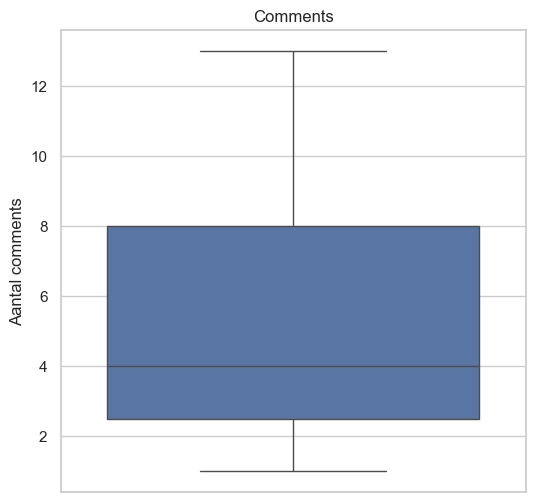

In [81]:
# Boxplot for comments - end values
plt.figure(figsize=(6, 6))
sns.boxplot(data=exp_videos, y='comments')

plt.title('Comments')
plt.ylabel('Aantal comments')
plt.show();

De boxplot geeft een visuele weergave van de verdeling van het aantal comments per video. De mediaan bedraagt 4,0 comments, wat overeenkomt met de eerder gerapporteerde beschrijvende statistieken. Het interkwartielbereik (IQR) loopt van 2,5 (25e percentiel) tot 8,0 (75e percentiel). De data vertoont geen uitschieters volgens de boxplot, maar de spreiding is relatief groot (1 tot 13 comments), wat wijst op aanzienlijke variabiliteit tussen de video’s. De asymmetrie in de verdeling, eerder geïdentificeerd als positieve scheefheid, wordt bevestigd door de hogere ligging van de bovenste helft van de boxplot.

In [9]:
# Get a statistical summary for comments - time series
exp_videos[['comments_24h', 'comments_1w', 'comments_2w', 'comments_1m', 'comments_2m', 'comments_3m']].describe()

,comments_24h,comments_1w,comments_2w,comments_1m,comments_2m,comments_3m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,2.727273,3.818182,4.181818,4.181818,4.363636,4.454545
std,1.348400,1.778661,1.721522,1.721522,1.747726,1.809068
min,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,2.000000,2.500000,3.000000,3.000000,3.000000,3.000000
50%,2.000000,3.000000,4.000000,4.000000,4.000000,4.000000
75%,3.000000,5.000000,5.500000,5.500000,6.000000,6.000000
max,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000


De beschrijvende statistieken tonen de evolutie van het aantal comments over zes meetmomenten (24 uur, 1 week, 2 weken, 1 maand, 2 maanden, 3 maanden). Het gemiddelde aantal comments stijgt geleidelijk van 2,73 na 24 uur (SD = 1,35) tot 4,45 na 3 maanden (SD = 1,81). De mediaan evolueert eveneens van 2,00 naar 4,00 over deze periode. De minimale en maximale waarden blijven relatief stabiel, met een minimum van 1–2 comments en een maximum van 6–7 comments. De interkwartielspreiding (IQR) toont een stijgende trend, wat wijst op een toename in zowel het centrale niveau als de spreiding van de reacties doorheen de tijd. Deze resultaten suggereren een continue groei in betrokkenheid gedurende de eerste drie maanden na publicatie.

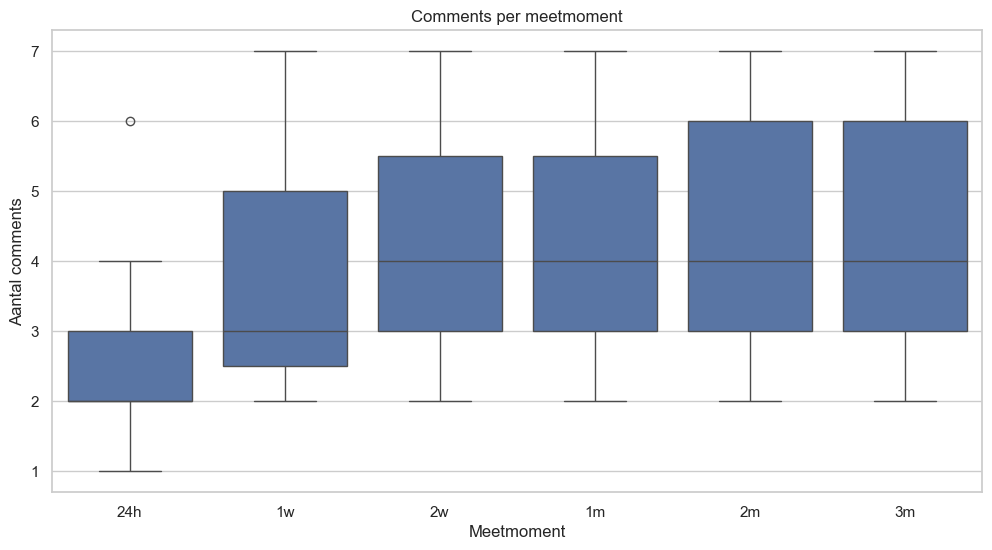

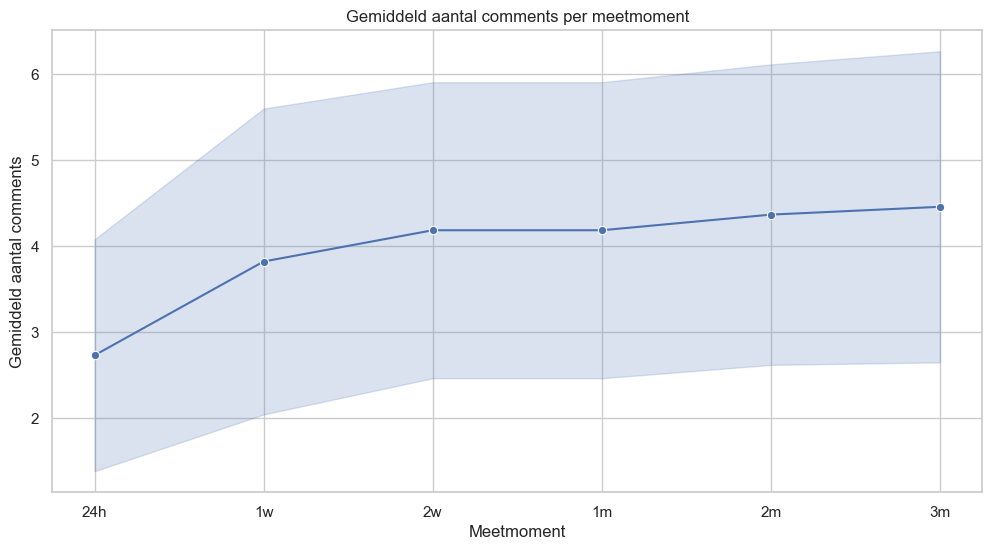

In [82]:
# Comments - time series

# Define the columns to plot
comments_columns = ['comments_24h', 'comments_1w', 'comments_2w', 'comments_1m', 'comments_2m', 'comments_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title'],
    value_vars=comments_columns,
    var_name='measurement_point',
    value_name='comment_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('comments_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='comment_value', data=exp_videos_long)

plt.title('Comments per meetmoment')
plt.ylabel('Aantal comments')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='comment_value', data=exp_videos_long, errorbar='sd', marker='o')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal comments per meetmoment')
plt.ylabel('Gemiddeld aantal comments')
plt.xlabel('Meetmoment')
plt.show();

Figuur 1 toont boxplots van het aantal comments per meetmoment (24 uur, 1 week, 2 weken, 1 maand, 2 maanden, 3 maanden). De mediaan stijgt geleidelijk van ongeveer 2–3 comments na 24 uur tot 4 comments na 3 maanden. De spreiding neemt eveneens toe, met een bredere interkwartielspreiding en een maximale waarde van 7 comments. Figuur 2, een lijnplot met standaarddeviatie, bevestigt deze trend en toont een gestage toename van het gemiddelde aantal comments doorheen de meetmomenten, met een duidelijke stijging na de eerste week en een stabilisatie na de tweede maand. Deze resultaten suggereren dat video’s gedurende meerdere maanden een toenemende betrokkenheid genereren, waarbij de meeste groei zich in de eerste weken voordoet.

#### Andere metrics

In [149]:
# Get a statistical summary for views - end values
exp_videos['views'].describe()

count      11.000000
mean     3010.727273
std      1444.606942
min      1263.000000
25%      2070.500000
50%      2254.000000
75%      3848.500000
max      5997.000000
Name: views, dtype: float64

De video’s hadden gemiddeld 3010,73 weergaven (SD = 1444,61; range: 1263–5997). Het 25ste percentiel lag op 2070,50, de mediaan (50ste percentiel) bedroeg 2254 weergaven en het 75ste percentiel lag op 3848,50 weergaven. De spreiding tussen minimum en maximum wijst op een aanzienlijke variatie in populariteit, met een lichte scheefheid naar rechts gezien de hogere maximale waarde ten opzichte van de mediaan.

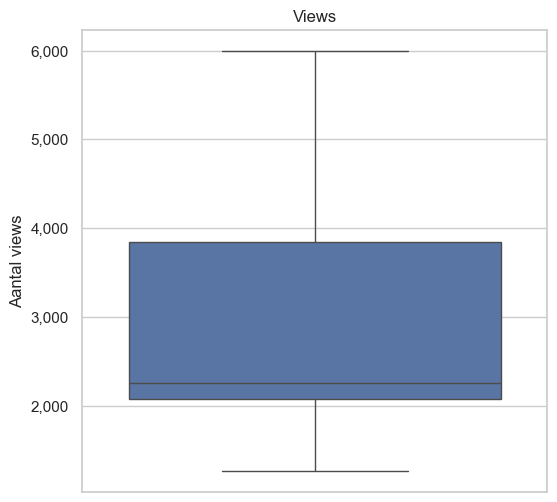

In [83]:
# Views - end values
plt.figure(figsize=(6, 6))
sns.boxplot(data=exp_videos, y='views')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Views')
plt.ylabel('Aantal views')
plt.show();

De boxplot geeft de spreiding van het aantal weergaven per video weer. De mediaan lag op ongeveer 2254 weergaven, met een interkwartielafstand van ongeveer 2070 tot 3849 weergaven. De minimumwaarde bedroeg 1263 en de maximumwaarde 5997 weergaven. Er werden geen duidelijke uitschieters gedetecteerd. De verdeling toont een lichte scheefheid naar rechts, wat duidt op enkele video’s met opvallend hoge kijkcijfers in vergelijking met de meerderheid.

In [10]:
# Get a statistical summary for views - time series
exp_videos[['views_24h', 'views_1w', 'views_2w', 'views_1m', 'views_2m', 'views_3m']].describe()

,views_24h,views_1w,views_2w,views_1m,views_2m,views_3m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,1153.545455,2101.636364,2356.545455,2542.545455,2765.090909,2890.090909
std,413.806081,1247.392663,1352.430210,1390.616868,1415.906244,1435.822723
min,560.000000,763.000000,855.000000,967.000000,1064.000000,1152.000000
25%,841.000000,1421.500000,1579.500000,1724.500000,1863.000000,1977.500000
50%,1086.000000,1461.000000,1652.000000,1805.000000,1951.000000,2055.000000
75%,1520.000000,2493.000000,2898.000000,3215.000000,3541.500000,3658.000000
max,1860.000000,5299.000000,5696.000000,5824.000000,5908.000000,5961.000000


De tijdreeksanalyse van het aantal weergaven toont een gestage toename over de meetmomenten heen. Binnen 24 uur werd een gemiddeld aantal weergaven van 1153.55 (SD = 413.87) waargenomen, dat opliep tot gemiddeld 2890.09 (SD = 1435.82) na drie maanden. De mediane weergaven stegen van 1152 (24 uur) naar 2055 (drie maanden), met een spreiding van minimaal 560 tot maximaal 5961 weergaven. Deze progressie wijst op een aanhoudende kijkersinteresse over de tijd, waarbij vooral tussen de eerste en derde maand een duidelijke toename zichtbaar is. De relatieve spreiding (SD) blijft stabiel over de tijd, wat duidt op een consistente variabiliteit tussen de video’s

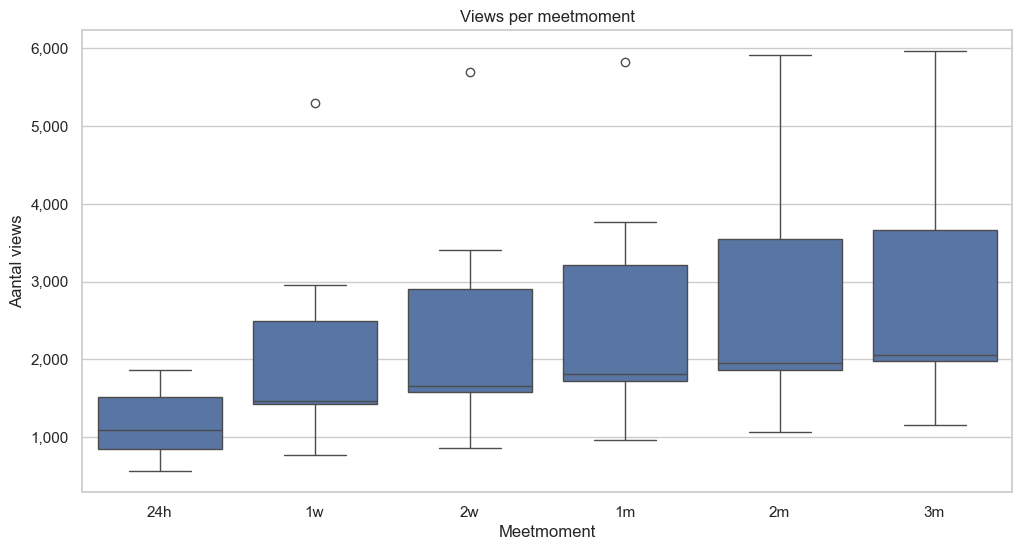

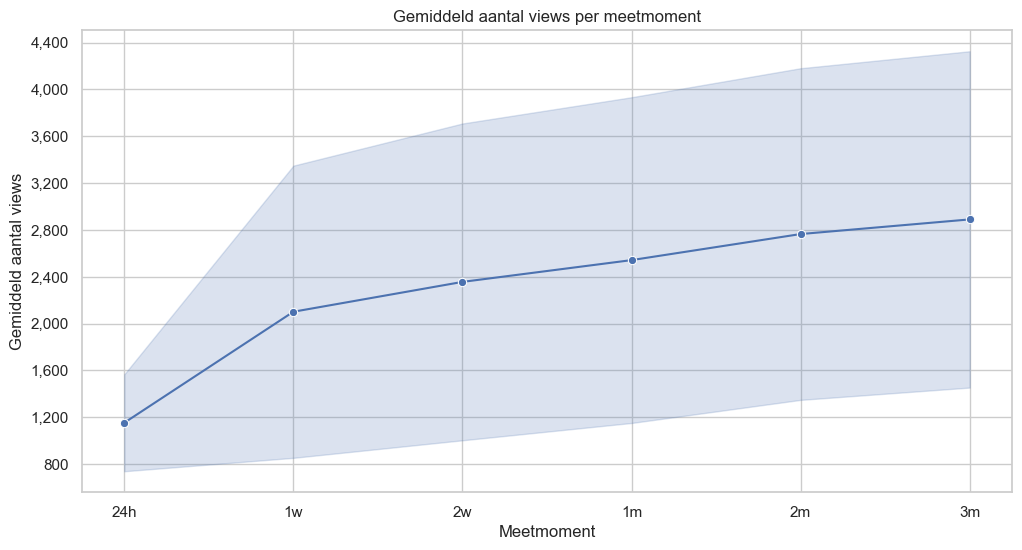

In [84]:
# Views - time series

# Define the columns to plot
views_columns = ['views_24h', 'views_1w', 'views_2w', 'views_1m', 'views_2m', 'views_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title'],
    value_vars=views_columns,
    var_name='measurement_point',
    value_name='view_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('views_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='view_value', data=exp_videos_long)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Views per meetmoment')
plt.ylabel('Aantal views')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='view_value', data=exp_videos_long, errorbar='sd', marker='o')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.title('Gemiddeld aantal views per meetmoment')
plt.ylabel('Gemiddeld aantal views')
plt.xlabel('Meetmoment')
plt.show();

De tijdreeksanalyse van het aantal weergaven laat een duidelijke stijging zien over de verschillende meetmomenten. De boxplot toont een toename in zowel de mediaan als de spreiding van het aantal weergaven tussen 24 uur (Mdn = ~1150) en drie maanden (Mdn = ~2050), met enkele uitschieters boven de 5000 weergaven vanaf week 1. De lijnplot bevestigt dit patroon, waarbij het gemiddelde aantal weergaven stijgt van M = 1153.55 (SD = 413.87) na 24 uur tot M = 2890.09 (SD = 1435.82) na drie maanden. Deze toename wijst op een aanhoudende kijkersinteresse en een accumulerend effect over de tijd. De breedte van de betrouwbaarheidsintervallen toont bovendien een stabiele maar brede spreiding in de latere meetmomenten, wat wijst op toenemende variabiliteit tussen de video’s.

In de analyse werd eenzelfde uitschieter waargenomen vanaf week 1 tot en met maand 1. Deze waarde viel op door aanzienlijk hogere views (≥ 5300) ten opzichte van de rest van de steekproef. Vanaf maand 2 werd deze waarde niet langer als uitschieter geclassificeerd, wat kan worden toegeschreven aan de stijgende mediaan en spreiding in de tijd.

In [11]:
# Get a statistical summary for likes - end values
exp_videos['likes'].describe()

count     11.000000
mean      64.454545
std       30.180668
min       23.000000
25%       42.500000
50%       52.000000
75%       90.000000
max      108.000000
Name: likes, dtype: float64

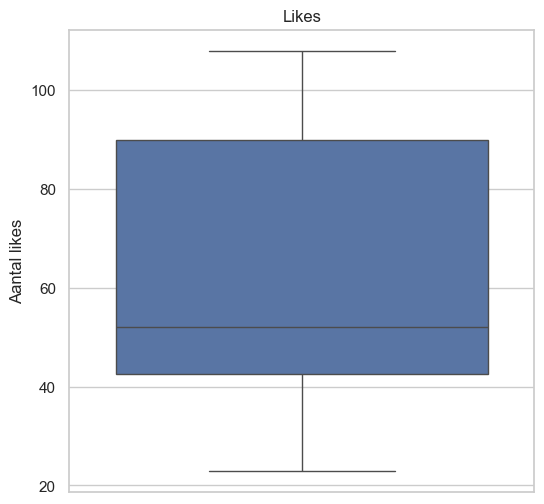

In [85]:
# Likes - end values
plt.figure(figsize=(6, 6))
sns.boxplot(data=exp_videos, y='likes')

plt.title('Likes')
plt.ylabel('Aantal likes')
plt.show();

In [12]:
# Get a statistical summary for likes - time series
exp_videos[['likes_24h', 'likes_1w', 'likes_2w', 'likes_1m', 'likes_2m', 'likes_3m']].describe()

,likes_24h,likes_1w,likes_2w,likes_1m,likes_2m,likes_3m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,34.181818,53.000000,56.727273,59.909091,62.727273,63.181818
std,17.600103,27.158792,28.379890,28.511242,29.718987,29.488364
min,11.000000,16.000000,19.000000,23.000000,23.000000,23.000000
25%,18.000000,35.000000,38.000000,39.000000,40.500000,41.000000
50%,37.000000,47.000000,47.000000,49.000000,50.000000,52.000000
75%,49.000000,71.000000,74.500000,81.000000,87.000000,86.500000
max,61.000000,102.000000,106.000000,108.000000,108.000000,107.000000


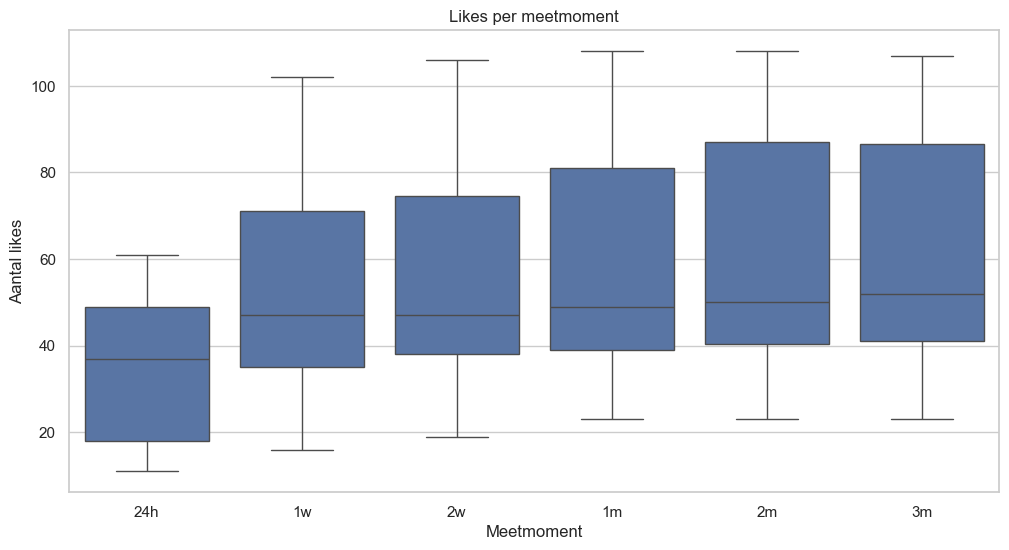

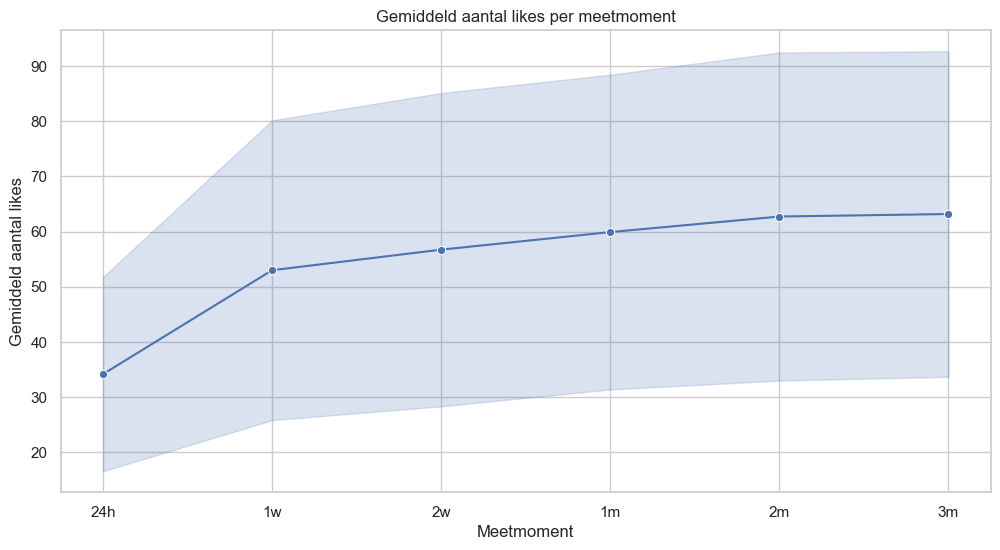

In [86]:
# Likes - time series

# Define the columns to plot
likes_columns = ['likes_24h', 'likes_1w', 'likes_2w', 'likes_1m', 'likes_2m', 'likes_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title'],
    value_vars=likes_columns,
    var_name='measurement_point',
    value_name='like_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('likes_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='like_value', data=exp_videos_long)

plt.title('Likes per meetmoment')
plt.ylabel('Aantal likes')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='like_value', data=exp_videos_long, errorbar='sd', marker='o')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal likes per meetmoment')
plt.ylabel('Gemiddeld aantal likes')
plt.xlabel('Meetmoment')
plt.show();

In [13]:
# Get a statistical summary for dislikes - end values
exp_videos['dislikes'].describe()

count    11.000000
mean      1.181818
std       1.662419
min       0.000000
25%       0.000000
50%       0.000000
75%       2.000000
max       5.000000
Name: dislikes, dtype: float64

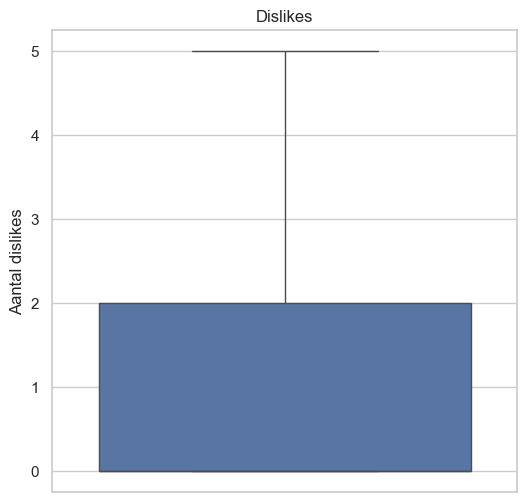

In [87]:
# Dislikes - end values
plt.figure(figsize=(6, 6))
sns.boxplot(data=exp_videos, y='dislikes')

plt.title('Dislikes')
plt.ylabel('Aantal dislikes')
plt.show();

In [14]:
# Get a statistical summary for dislikes - time series
exp_videos[['dislikes_24h', 'dislikes_1w', 'dislikes_2w', 'dislikes_1m', 'dislikes_2m', 'dislikes_3m']].describe()

,dislikes_24h,dislikes_1w,dislikes_2w,dislikes_1m,dislikes_2m,dislikes_3m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,0.636364,1.090909,1.090909,1.090909,1.090909,1.090909
std,0.809040,1.221028,1.221028,1.221028,1.445998,1.445998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,3.000000,3.000000,3.000000,4.000000,4.000000


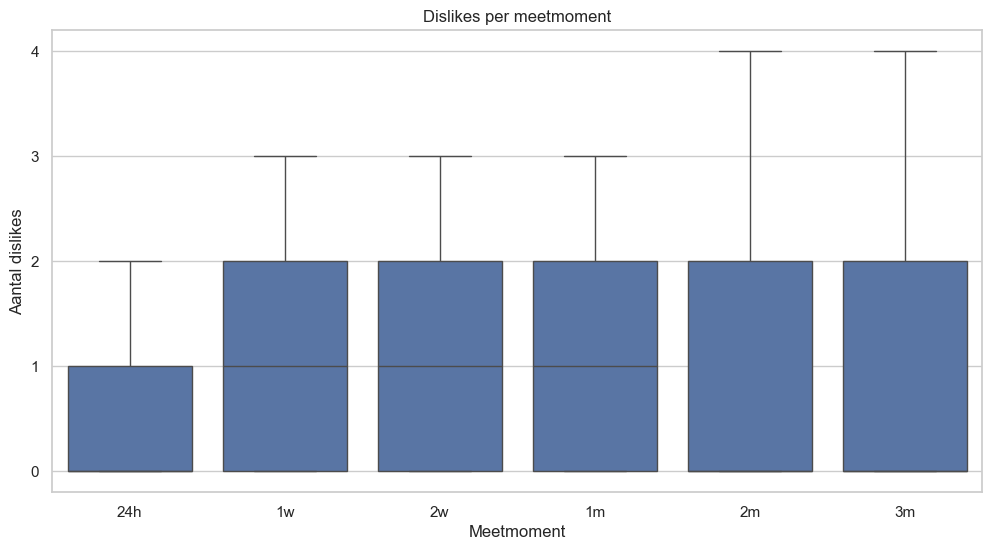

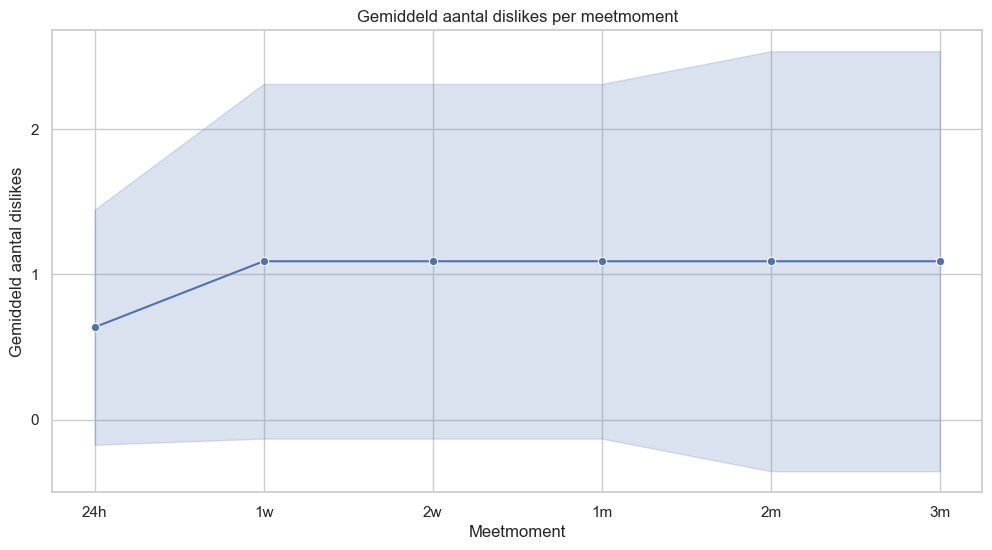

In [88]:
# Dislikes - time series

# Define the columns to plot
dislikes_columns = ['dislikes_24h', 'dislikes_1w', 'dislikes_2w', 'dislikes_1m', 'dislikes_2m', 'dislikes_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title'],
    value_vars=dislikes_columns,
    var_name='measurement_point',
    value_name='dislike_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('dislikes_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='dislike_value', data=exp_videos_long)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Force integers on y-axis

plt.title('Dislikes per meetmoment')
plt.ylabel('Aantal dislikes')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='dislike_value', data=exp_videos_long, errorbar='sd', marker='o')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal dislikes per meetmoment')
plt.ylabel('Gemiddeld aantal dislikes')
plt.xlabel('Meetmoment')
plt.show();

In [15]:
# Get a statistical summary for shares - end values
exp_videos['shares'].describe()

count     11.000000
mean      43.363636
std       32.441556
min       18.000000
25%       24.500000
50%       28.000000
75%       46.000000
max      112.000000
Name: shares, dtype: float64

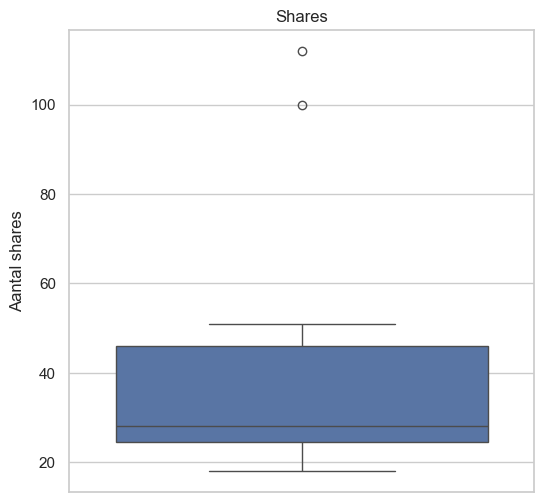

In [89]:
# Shares - end values
plt.figure(figsize=(6, 6))
sns.boxplot(data=exp_videos, y='shares')

plt.title('Shares')
plt.ylabel('Aantal shares')
plt.show();

De analyse van de shares toont een gemiddelde van M = 43,36 met een standaarddeviatie van SD = 32,44. Het minimumaantal shares bedraagt 18, terwijl het maximum opvallend hoog is met 112. De mediaan (50e percentiel) bedraagt 28, met een interkwartielafstand (IQR) van 46 - 24,5 = 21,5.

De boxplot toont twee duidelijke uitschieters boven de 100 shares. Deze vallen buiten het normale spreidingsbereik, aangezien de bovenste grens (Q3 + 1,5 \times IQR) ongeveer 46 + 1,5 \times 21,5 = 78,25 bedraagt. De waargenomen waarden van 100 en 112 overschrijden deze drempel en worden daarom als uitschieters geclassificeerd.

In [16]:
# Get a statistical summary for shares - time series
exp_videos[['shares_24h', 'shares_1w', 'shares_2w', 'shares_1m', 'shares_2m', 'shares_3m']].describe()

,shares_24h,shares_1w,shares_2w,shares_1m,shares_2m,shares_3m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,15.363636,30.181818,33.909091,36.181818,39.545455,41.545455
std,9.892146,24.640691,26.413839,28.343670,31.379495,32.463406
min,7.000000,8.000000,12.000000,13.000000,15.000000,17.000000
25%,8.000000,13.500000,17.000000,19.500000,21.000000,22.000000
50%,11.000000,22.000000,22.000000,22.000000,25.000000,27.000000
75%,20.000000,35.000000,41.000000,42.500000,45.000000,45.000000
max,36.000000,87.000000,93.000000,95.000000,101.000000,109.000000


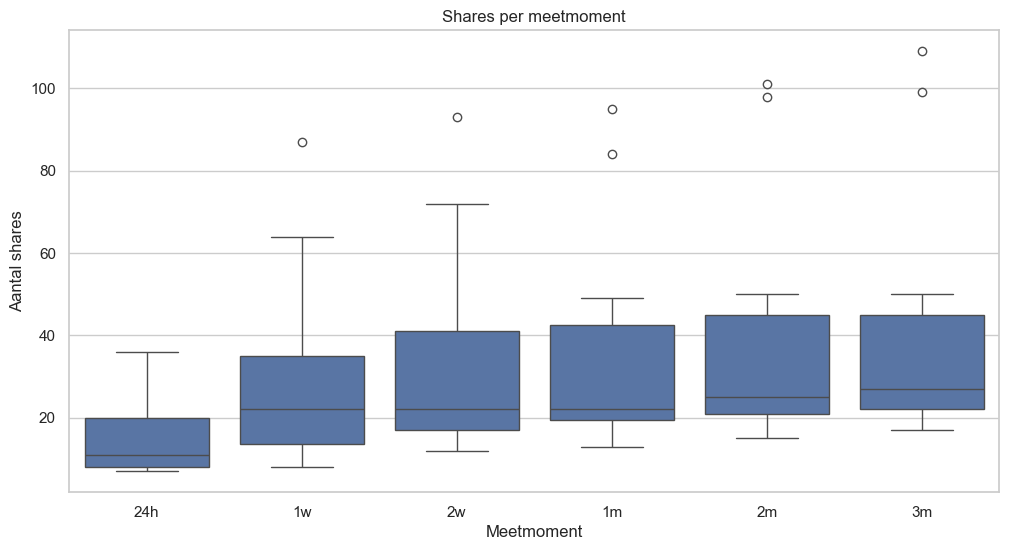

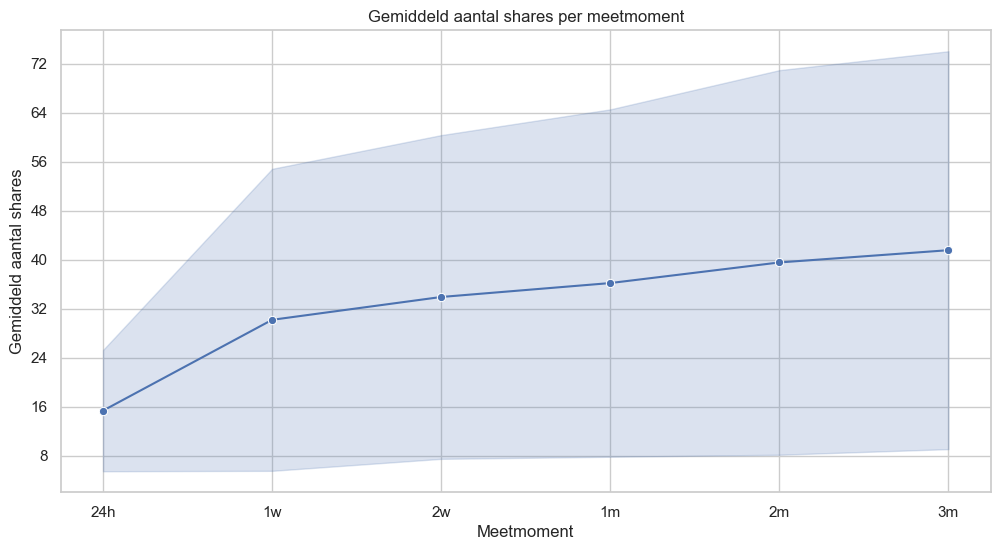

In [90]:
# Shares - time series

# Define the columns to plot
shares_columns = ['shares_24h', 'shares_1w', 'shares_2w', 'shares_1m', 'shares_2m', 'shares_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title'],
    value_vars=shares_columns,
    var_name='measurement_point',
    value_name='share_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('shares_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='share_value', data=exp_videos_long)

plt.title('Shares per meetmoment')
plt.ylabel('Aantal shares')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='share_value', data=exp_videos_long, errorbar='sd', marker='o')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal shares per meetmoment')
plt.ylabel('Gemiddeld aantal shares')
plt.xlabel('Meetmoment')
plt.show();

In [17]:
# Get a statistical summary for engagement - end values
exp_videos['engagement'].describe()

count    11.000000
mean      3.645455
std       0.501684
min       2.660000
25%       3.495000
50%       3.620000
75%       3.780000
max       4.780000
Name: engagement, dtype: float64

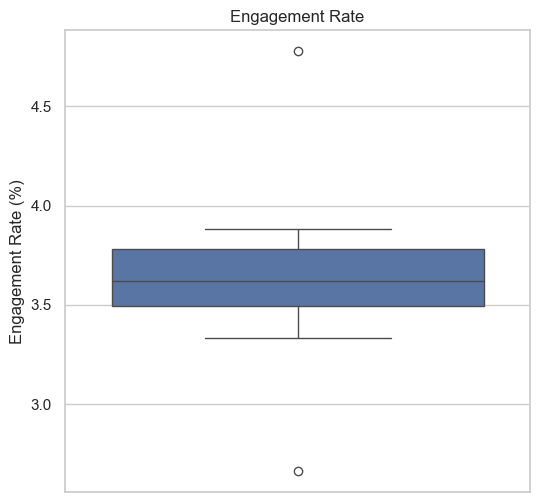

In [91]:
# Engagement - end values
plt.figure(figsize=(6, 6))
sns.boxplot(data=exp_videos, y='engagement')

plt.title('Engagement Rate')
plt.ylabel('Engagement Rate (%)')
plt.show();

In [20]:
# Get a statistical summary for engagement - time series
exp_videos[['engagement_rate_24h', 'engagement_rate_1w', 'engagement_rate_2w', 'engagement_rate_1m', 'engagement_rate_2m', 'engagement_rate_3m']].describe()

,engagement_rate_24h,engagement_rate_1w,engagement_rate_2w,engagement_rate_1m,engagement_rate_2m,engagement_rate_3m
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,4.350909,4.152727,4.027273,3.931818,3.789091,3.704545
std,0.864170,0.860013,0.763022,0.654764,0.616270,0.558182
min,2.530000,2.610000,2.600000,2.890000,2.870000,2.740000
25%,3.820000,3.535000,3.630000,3.600000,3.490000,3.490000
50%,4.530000,4.180000,4.060000,3.830000,3.690000,3.650000
75%,5.010000,4.605000,4.285000,4.085000,3.890000,3.745000
max,5.300000,5.640000,5.380000,5.170000,4.970000,4.830000


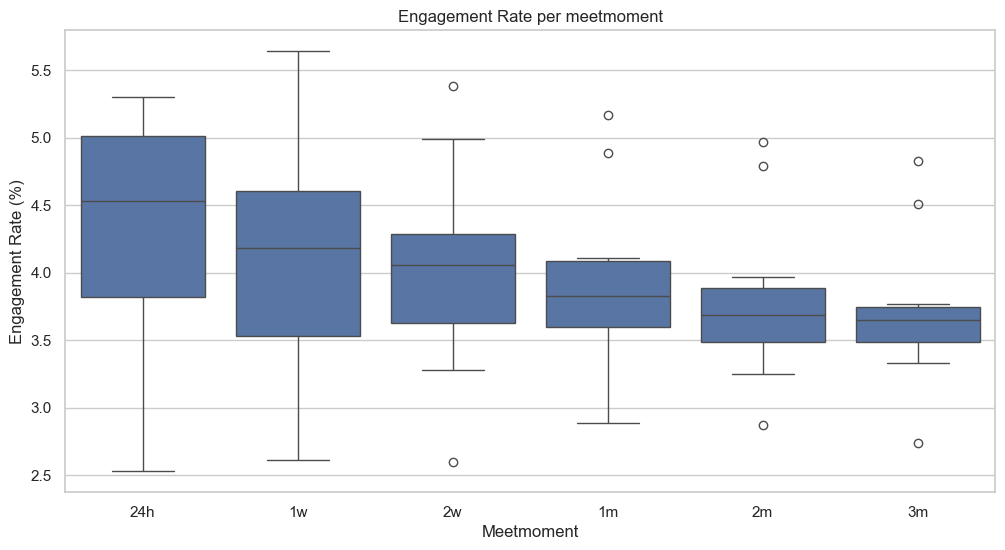

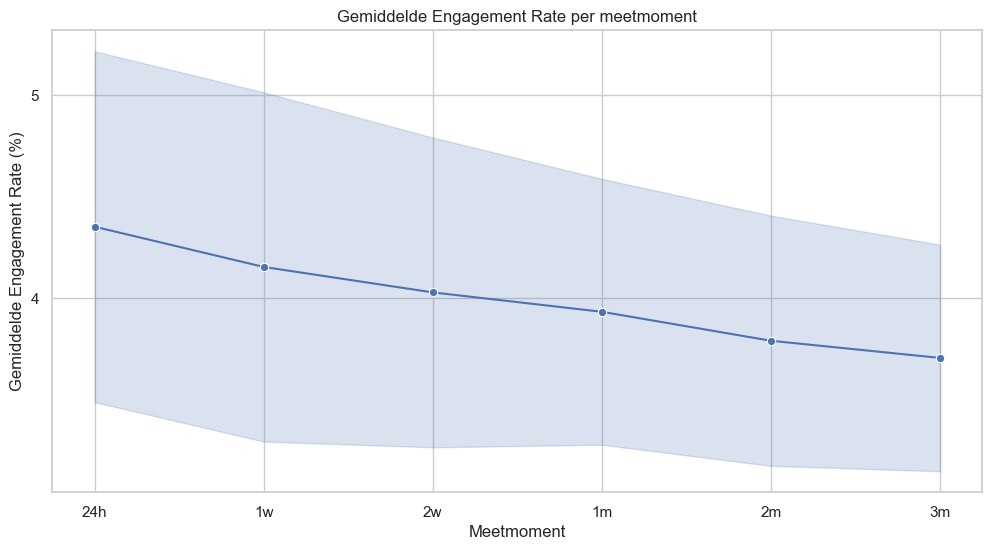

In [92]:
# Engagement Rate - time series

# Define the columns to plot
engagements_columns = ['engagement_rate_24h', 'engagement_rate_1w', 'engagement_rate_2w', 'engagement_rate_1m', 'engagement_rate_2m', 'engagement_rate_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title'],
    value_vars=engagements_columns,
    var_name='measurement_point',
    value_name='engagement_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('engagement_rate_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='engagement_value', data=exp_videos_long)

plt.title('Engagement Rate per meetmoment')
plt.ylabel('Engagement Rate (%)')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='engagement_value', data=exp_videos_long, errorbar='sd', marker='o')
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddelde Engagement Rate per meetmoment')
plt.ylabel('Gemiddelde Engagement Rate (%)')
plt.xlabel('Meetmoment')
plt.show();

#### Correlatie

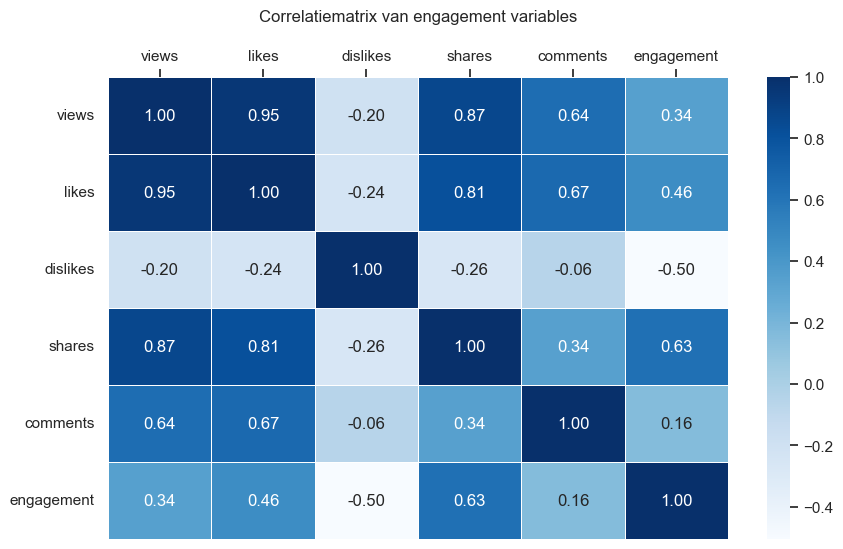

In [72]:
# Create correlation matrix for statistical analysis (total only)
correlation_matrix = exp_videos[['views', 'likes', 'dislikes', 'shares', 'comments', 'engagement']].corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
ax = sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
ax.xaxis.set_label_position('top')
ax.xaxis.tick_top()
plt.title('Correlatiematrix van engagement variables', pad=40)  # Moves title up

# Show the plot
plt.show();

### Per group (CTA vs No CTA)

#### Comments

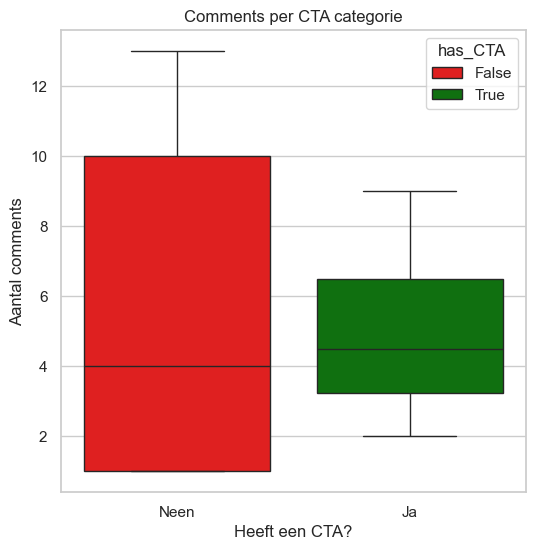

In [117]:
# Comments - end values
cta_palette = {False: 'red', True: 'green'}
plt.figure(figsize=(6, 6))
sns.boxplot(x='has_CTA', y='comments', data=exp_videos, hue='has_CTA', palette=cta_palette)

plt.title('Comments per CTA categorie')
plt.ylabel('Aantal comments')
plt.xlabel('Heeft een CTA?')
plt.xticks([0, 1], ['Neen', 'Ja'])
plt.show();

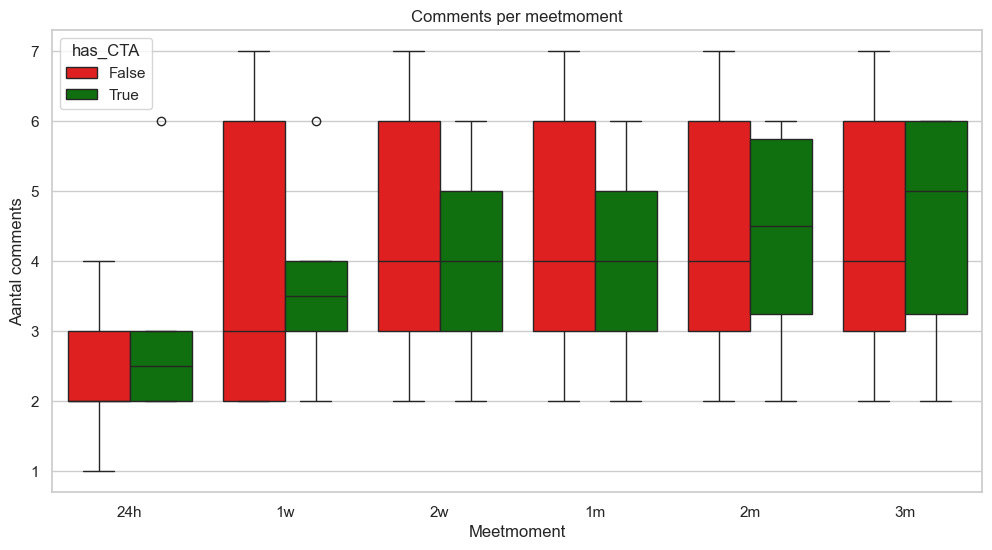

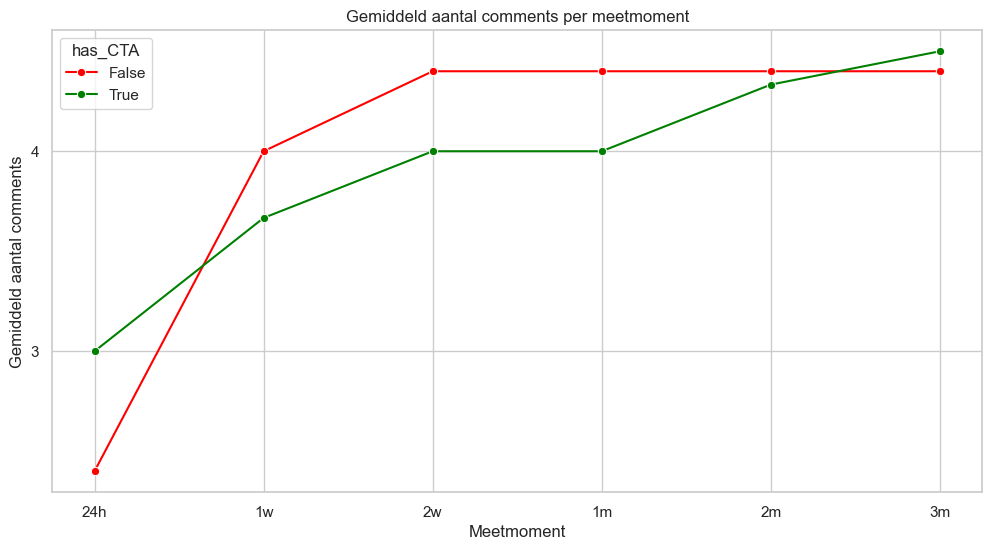

In [133]:
# Comments - time series

# Define the columns to plot
comments_columns = ['comments_24h', 'comments_1w', 'comments_2w', 'comments_1m', 'comments_2m', 'comments_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title', 'has_CTA'],
    value_vars=comments_columns,
    var_name='measurement_point',
    value_name='comment_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('comments_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Color map
cta_palette = {False: 'red', True: 'green'}

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='comment_value', hue='has_CTA', data=exp_videos_long, palette=cta_palette)

plt.title('Comments per meetmoment')
plt.ylabel('Aantal comments')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
mean_comments = exp_videos_long.groupby(['measurement_point', 'has_CTA'], observed=True)['comment_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='comment_value', hue='has_CTA', data=mean_comments, errorbar='sd', marker='o', palette=cta_palette)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal comments per meetmoment')
plt.ylabel('Gemiddeld aantal comments')
plt.xlabel('Meetmoment')
plt.show();

#### Andere metrics

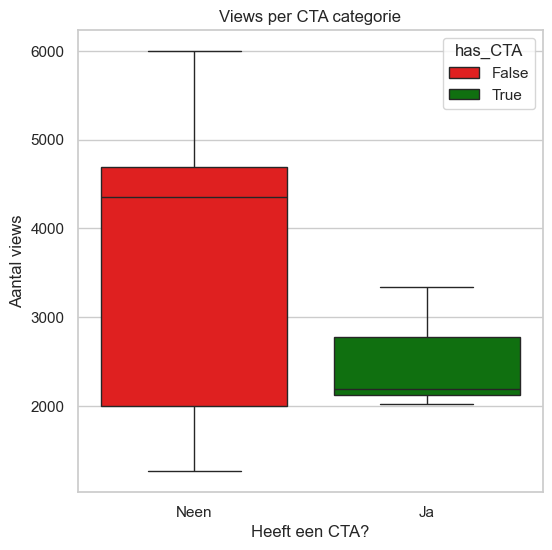

In [112]:
# Views - end values
cta_palette = {False: 'red', True: 'green'}
plt.figure(figsize=(6, 6))
sns.boxplot(x='has_CTA', y='views', data=exp_videos, hue='has_CTA', palette=cta_palette)

plt.title('Views per CTA categorie')
plt.ylabel('Aantal views')
plt.xlabel('Heeft een CTA?')
plt.xticks([0, 1], ['Neen', 'Ja'])
plt.show();

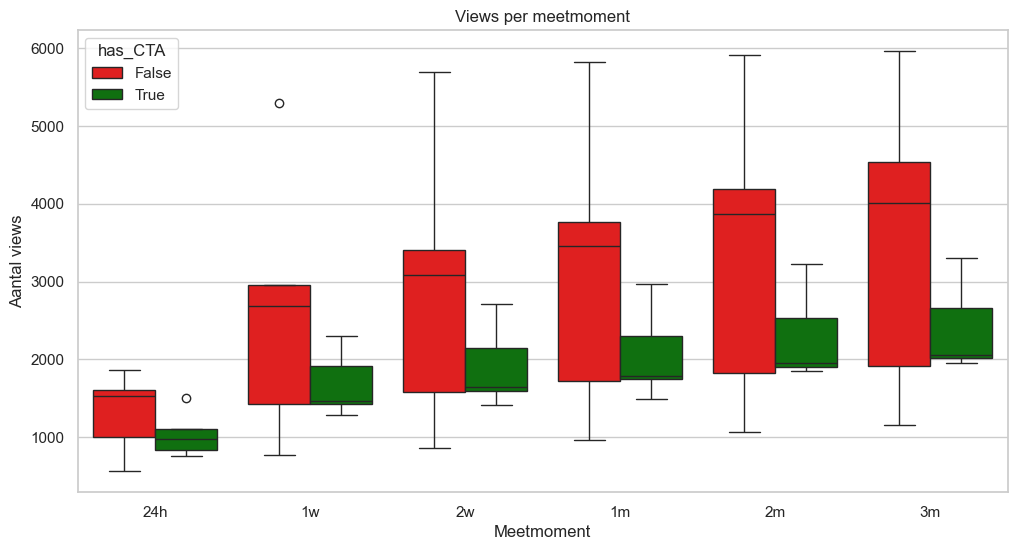

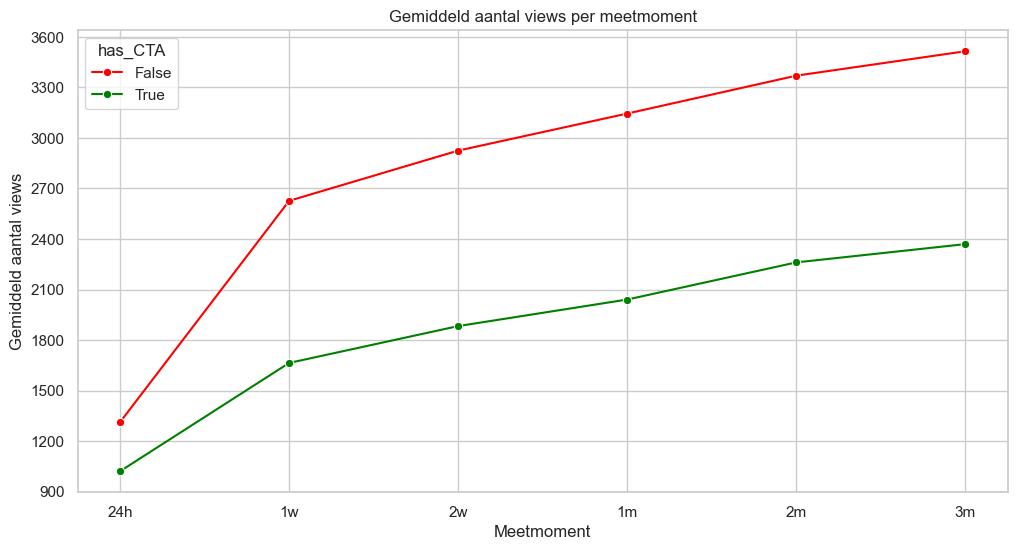

In [118]:
# Views - time series

# Define the columns to plot
views_columns = ['views_24h', 'views_1w', 'views_2w', 'views_1m', 'views_2m', 'views_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title', 'has_CTA'],
    value_vars=views_columns,
    var_name='measurement_point',
    value_name='view_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('views_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Color map
cta_palette = {False: 'red', True: 'green'}

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='view_value', hue='has_CTA', data=exp_videos_long, palette=cta_palette)

plt.title('Views per meetmoment')
plt.ylabel('Aantal views')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
mean_views = exp_videos_long.groupby(['measurement_point', 'has_CTA'], observed=True)['view_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='view_value', hue='has_CTA', data=mean_views, errorbar='sd', marker='o', palette=cta_palette)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal views per meetmoment')
plt.ylabel('Gemiddeld aantal views')
plt.xlabel('Meetmoment')
plt.show();

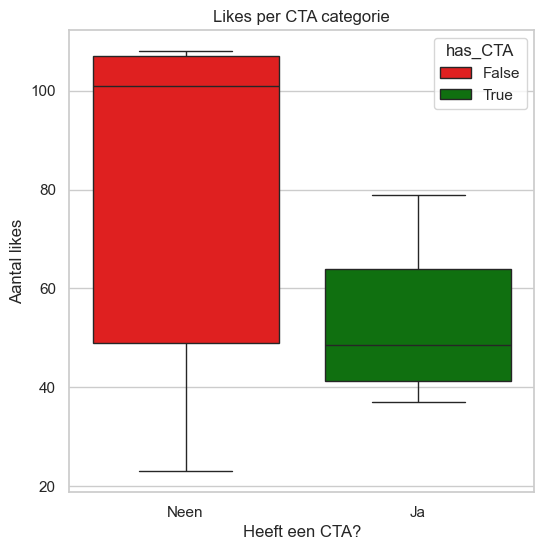

In [113]:
# Likes - end values
cta_palette = {False: 'red', True: 'green'}
plt.figure(figsize=(6, 6))
sns.boxplot(x='has_CTA', y='likes', data=exp_videos, hue='has_CTA', palette=cta_palette)

plt.title('Likes per CTA categorie')
plt.ylabel('Aantal likes')
plt.xlabel('Heeft een CTA?')
plt.xticks([0, 1], ['Neen', 'Ja'])
plt.show();

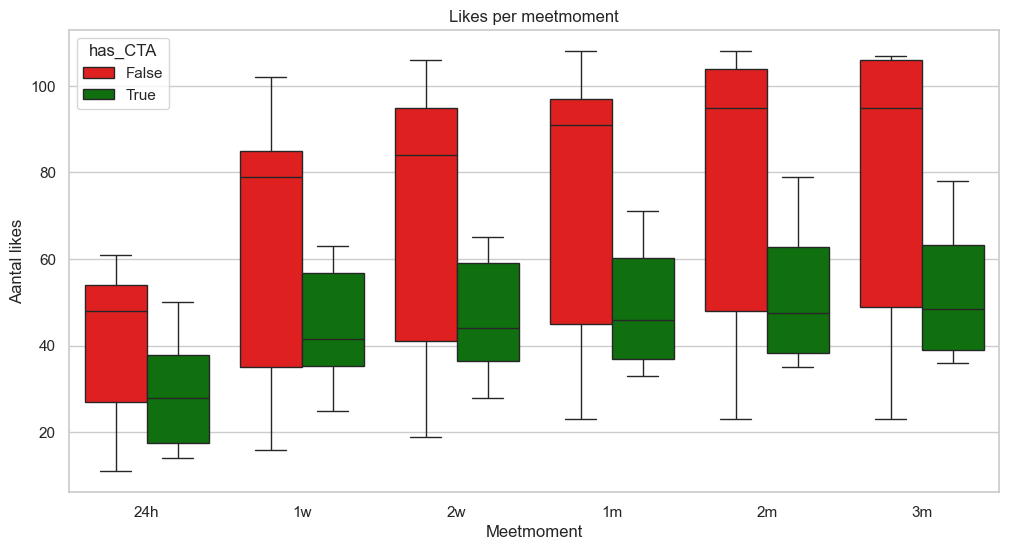

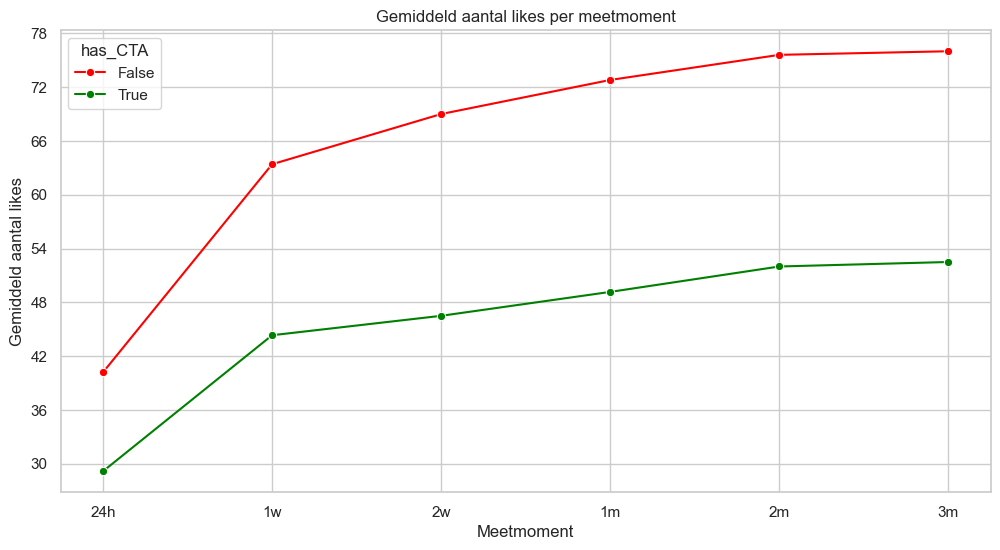

In [119]:
# Likes - time series

# Define the columns to plot
likes_columns = ['likes_24h', 'likes_1w', 'likes_2w', 'likes_1m', 'likes_2m', 'likes_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title', 'has_CTA'],
    value_vars=likes_columns,
    var_name='measurement_point',
    value_name='like_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('likes_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Color map
cta_palette = {False: 'red', True: 'green'}

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='like_value', hue='has_CTA', data=exp_videos_long, palette=cta_palette)

plt.title('Likes per meetmoment')
plt.ylabel('Aantal likes')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
mean_likes = exp_videos_long.groupby(['measurement_point', 'has_CTA'], observed=True)['like_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='like_value', hue='has_CTA', data=mean_likes, errorbar='sd', marker='o', palette=cta_palette)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal likes per meetmoment')
plt.ylabel('Gemiddeld aantal likes')
plt.xlabel('Meetmoment')
plt.show();

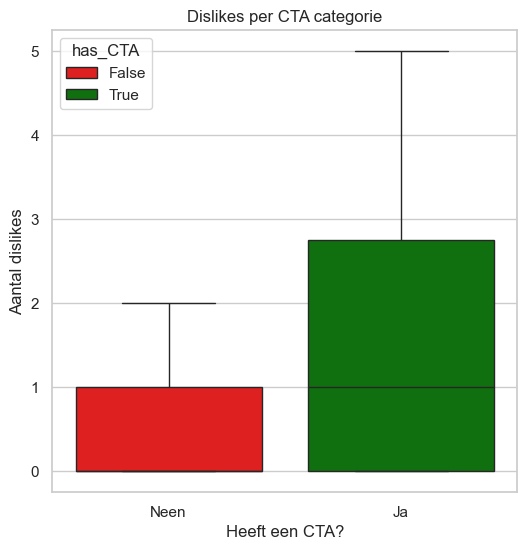

In [114]:
# Dislikes - end values
cta_palette = {False: 'red', True: 'green'}
plt.figure(figsize=(6, 6))
sns.boxplot(x='has_CTA', y='dislikes', data=exp_videos, hue='has_CTA', palette=cta_palette)

plt.title('Dislikes per CTA categorie')
plt.ylabel('Aantal dislikes')
plt.xlabel('Heeft een CTA?')
plt.xticks([0, 1], ['Neen', 'Ja'])
plt.show();

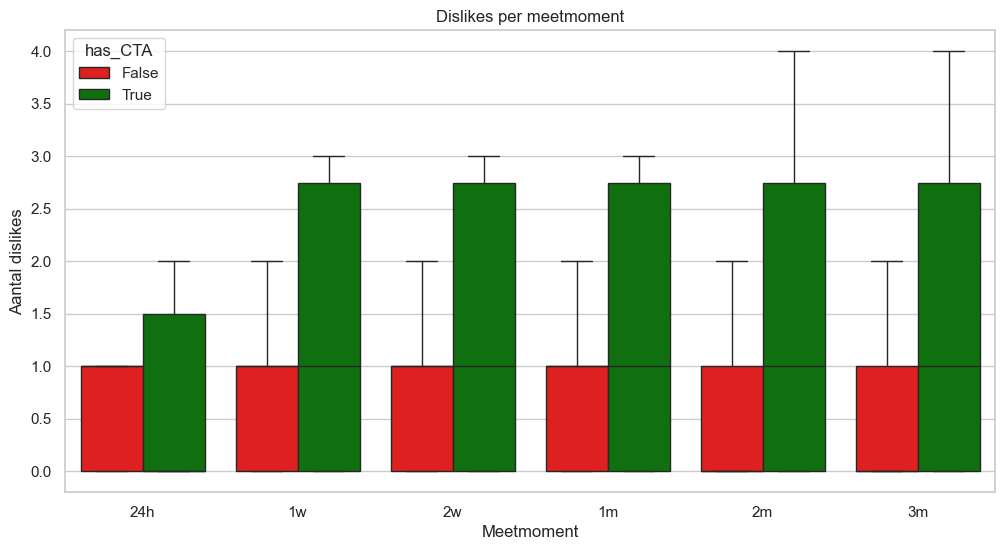

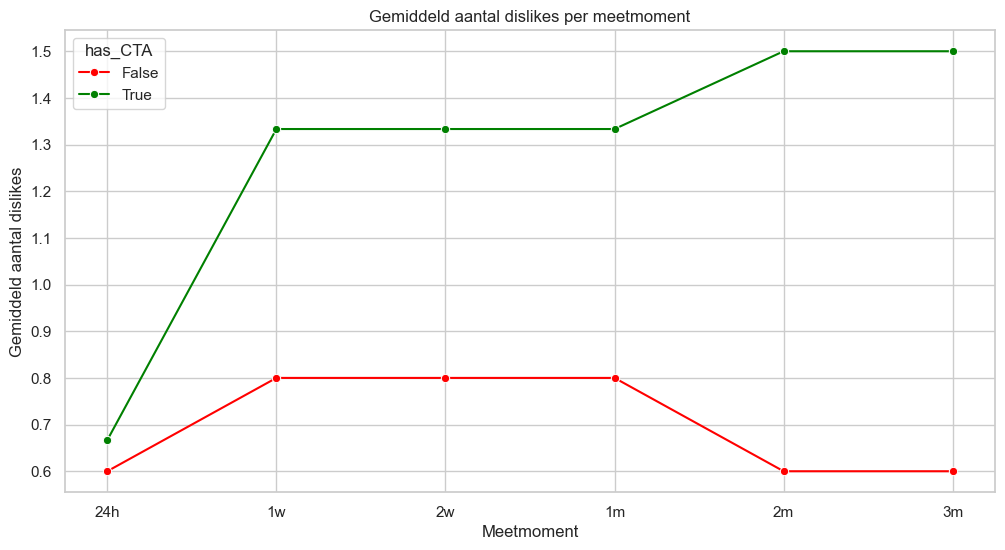

In [120]:
# Dislikes - time series

# Define the columns to plot
dislikes_columns = ['dislikes_24h', 'dislikes_1w', 'dislikes_2w', 'dislikes_1m', 'dislikes_2m', 'dislikes_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title', 'has_CTA'],
    value_vars=dislikes_columns,
    var_name='measurement_point',
    value_name='dislike_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('dislikes_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Color map
cta_palette = {False: 'red', True: 'green'}

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='dislike_value', hue='has_CTA', data=exp_videos_long, palette=cta_palette)

plt.title('Dislikes per meetmoment')
plt.ylabel('Aantal dislikes')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
mean_dislikes = exp_videos_long.groupby(['measurement_point', 'has_CTA'], observed=True)['dislike_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='dislike_value', hue='has_CTA', data=mean_dislikes, errorbar='sd', marker='o', palette=cta_palette)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal dislikes per meetmoment')
plt.ylabel('Gemiddeld aantal dislikes')
plt.xlabel('Meetmoment')
plt.show();

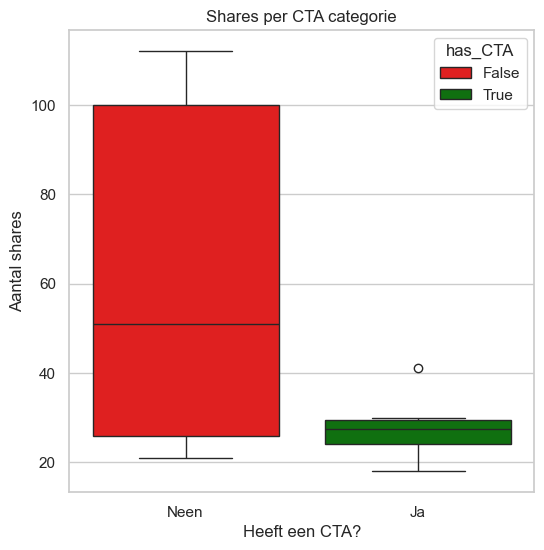

In [115]:
# Shares - end values
cta_palette = {False: 'red', True: 'green'}
plt.figure(figsize=(6, 6))
sns.boxplot(x='has_CTA', y='shares', data=exp_videos, hue='has_CTA', palette=cta_palette)

plt.title('Shares per CTA categorie')
plt.ylabel('Aantal shares')
plt.xlabel('Heeft een CTA?')
plt.xticks([0, 1], ['Neen', 'Ja'])
plt.show();

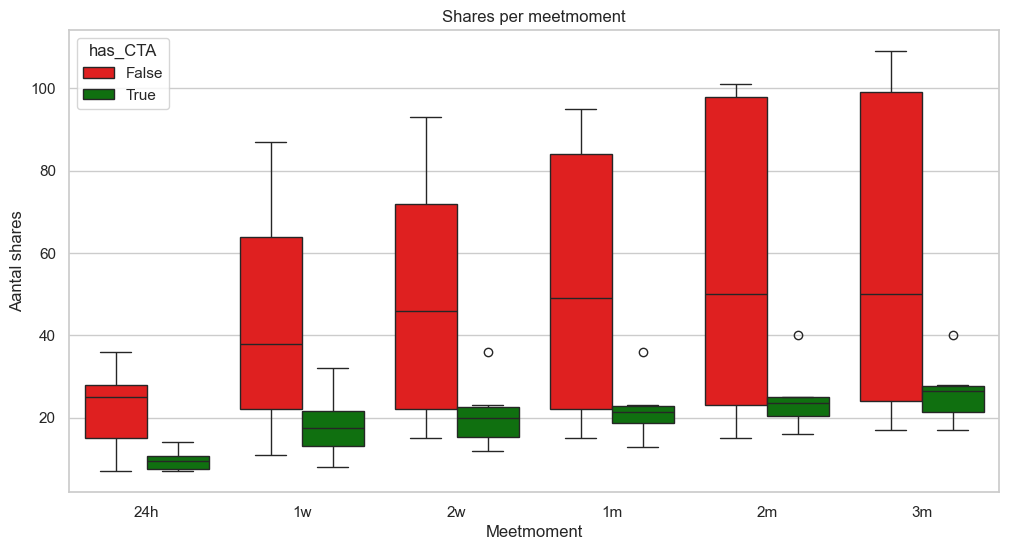

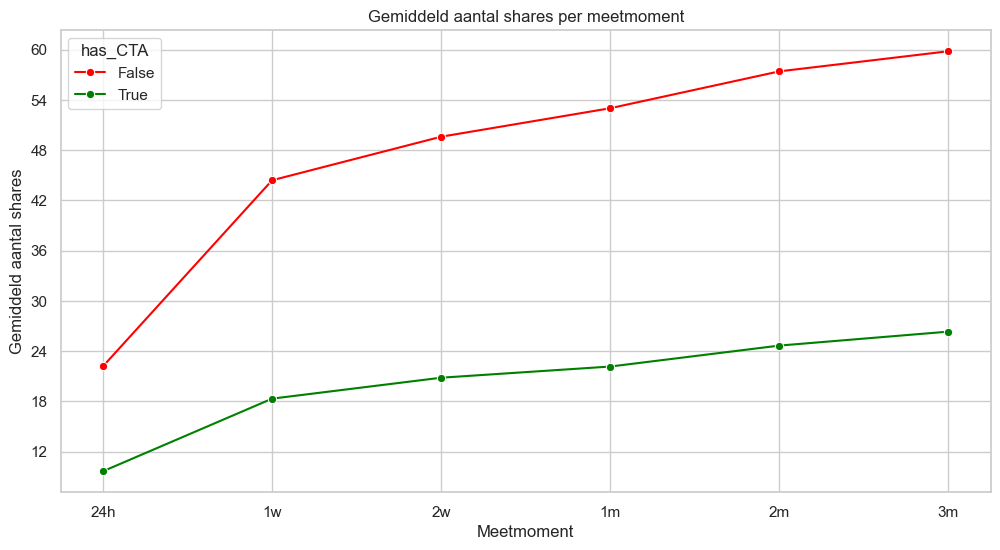

In [121]:
# Shares - time series

# Define the columns to plot
shares_columns = ['shares_24h', 'shares_1w', 'shares_2w', 'shares_1m', 'shares_2m', 'shares_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title', 'has_CTA'],
    value_vars=shares_columns,
    var_name='measurement_point',
    value_name='share_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('shares_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Color map
cta_palette = {False: 'red', True: 'green'}

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='share_value', hue='has_CTA', data=exp_videos_long, palette=cta_palette)

plt.title('Shares per meetmoment')
plt.ylabel('Aantal shares')
plt.xlabel('Meetmoment')
plt.show()

# Create the line plot with standard deviation as error bar (shaded zone)
mean_shares = exp_videos_long.groupby(['measurement_point', 'has_CTA'], observed=True)['share_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='share_value', hue='has_CTA', data=mean_shares, errorbar='sd', marker='o', palette=cta_palette)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddeld aantal shares per meetmoment')
plt.ylabel('Gemiddeld aantal shares')
plt.xlabel('Meetmoment')
plt.show()

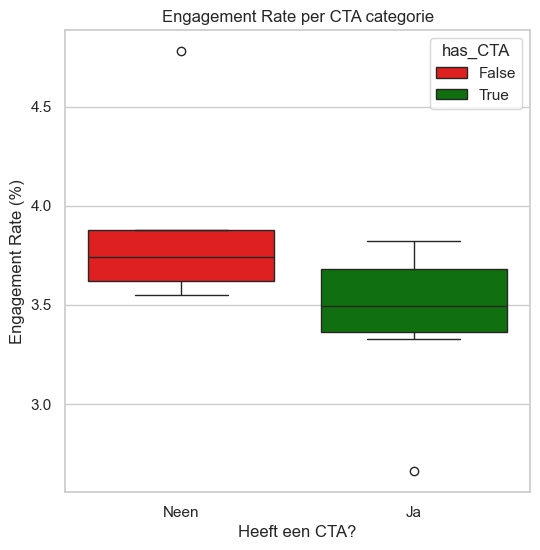

In [116]:
# Engagement Rate - end values
cta_palette = {False: 'red', True: 'green'}
plt.figure(figsize=(6, 6))
sns.boxplot(x='has_CTA', y='engagement', data=exp_videos, hue='has_CTA', palette=cta_palette)

plt.title('Engagement Rate per CTA categorie')
plt.ylabel('Engagement Rate (%)')
plt.xlabel('Heeft een CTA?')
plt.xticks([0, 1], ['Neen', 'Ja'])
plt.show();

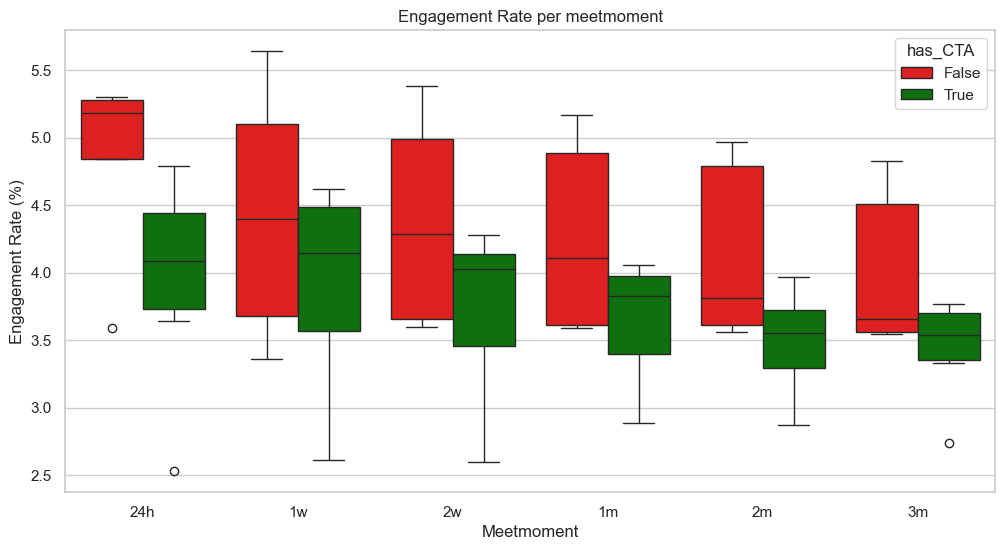

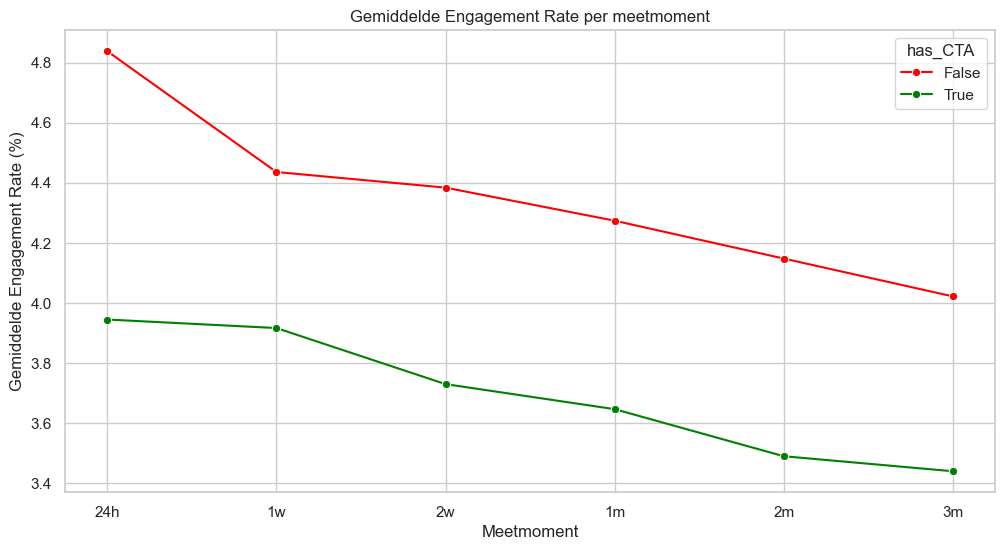

In [122]:
# Engagement Rate - time series

# Define the columns to plot
engagements_columns = ['engagement_rate_24h', 'engagement_rate_1w', 'engagement_rate_2w', 'engagement_rate_1m', 'engagement_rate_2m', 'engagement_rate_3m']

# Transform the data to long format
exp_videos_long = exp_videos.melt(
    id_vars=['id', 'title', 'has_CTA'],
    value_vars=engagements_columns,
    var_name='measurement_point',
    value_name='engagement_value'
)

# Rename measure points
exp_videos_long['measurement_point'] = exp_videos_long['measurement_point'].str.replace('engagement_rate_', '')
order = ['24h', '1w', '2w', '1m', '2m', '3m']
exp_videos_long['measurement_point'] = pd.Categorical(exp_videos_long['measurement_point'], categories=order, ordered=True)

# Color map
cta_palette = {False: 'red', True: 'green'}

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='measurement_point', y='engagement_value', hue='has_CTA', data=exp_videos_long, palette=cta_palette)

plt.title('Engagement Rate per meetmoment')
plt.ylabel('Engagement Rate (%)')
plt.xlabel('Meetmoment')
plt.show();

# Create the line plot with standard deviation as error bar (shaded zone)
mean_engagement = exp_videos_long.groupby(['measurement_point', 'has_CTA'], observed=True)['engagement_value'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='measurement_point', y='engagement_value', hue='has_CTA', data=mean_engagement, errorbar='sd', marker='o', palette=cta_palette)
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.title('Gemiddelde Engagement Rate per meetmoment')
plt.ylabel('Gemiddelde Engagement Rate (%)')
plt.xlabel('Meetmoment')
plt.show();

#### Trends en patronen

In [123]:
# Engagement metrics vs has_CTA
metrics = ['views', 'likes', 'dislikes', 'shares', 'comments', 'engagement']
cta_stats_mean = exp_videos.groupby('has_CTA')[metrics].mean()
cta_stats_median = exp_videos.groupby('has_CTA')[metrics].median()
cta_stats_std = exp_videos.groupby('has_CTA')[metrics].std()
cta_stats = pd.DataFrame({
    'mean': cta_stats_mean.stack().round(3),
    'median': cta_stats_median.stack().round(3),
    'std': cta_stats_std.stack().round(3)
})
cta_stats

mean    median       std
has_CTA                                         
False   views       3661.400  4359.000  1969.020
        likes         77.600   101.000    39.164
        dislikes       0.600     0.000     0.894
        shares        62.000    51.000    41.958
        comments       5.800     4.000     5.450
        engagement     3.914     3.740     0.500
True    views       2468.500  2188.500   544.022
        likes         53.500    48.500    16.670
        dislikes       1.667     1.000     2.066
        shares        27.833    27.500     7.731
        comments       5.000     4.500     2.608
        engagement     3.422     3.495     0.414

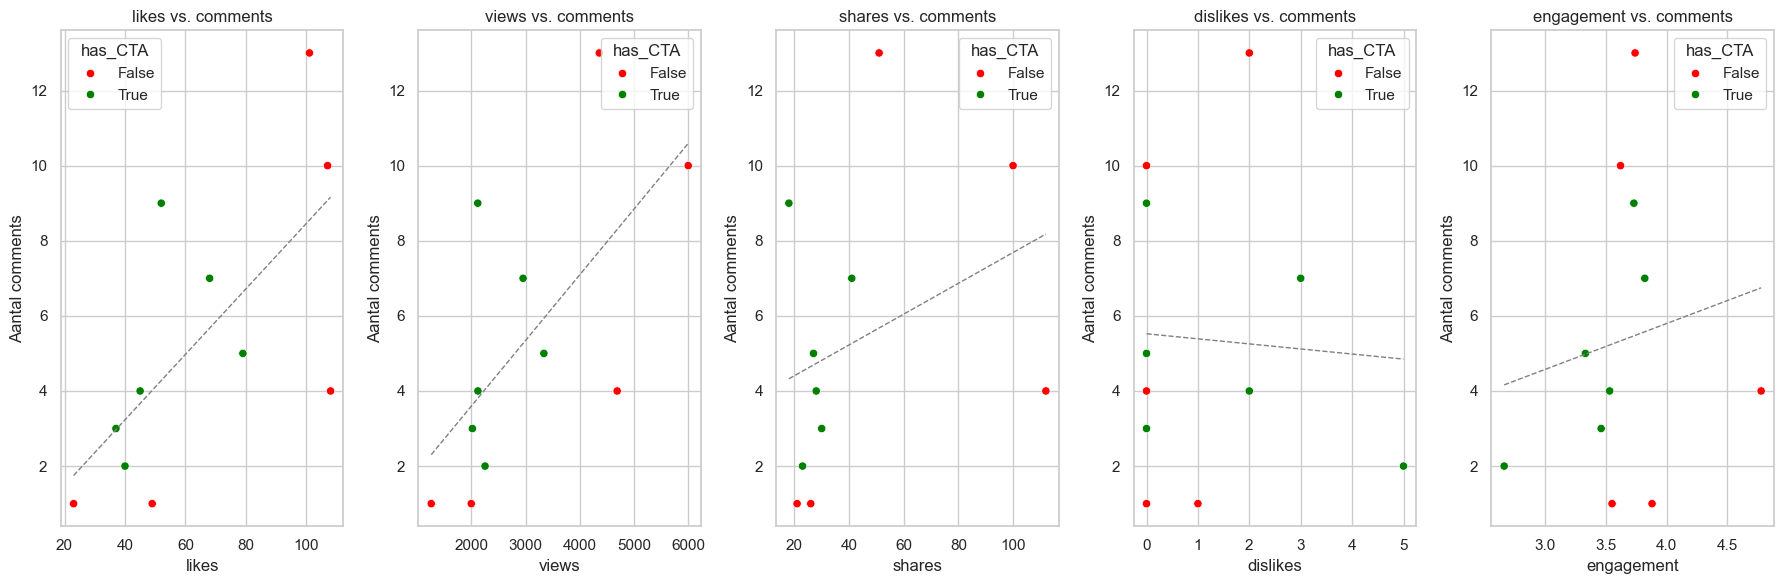

In [150]:
# Comment patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['comments'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['comments'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. comments')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal comments')
plt.tight_layout()
plt.show();

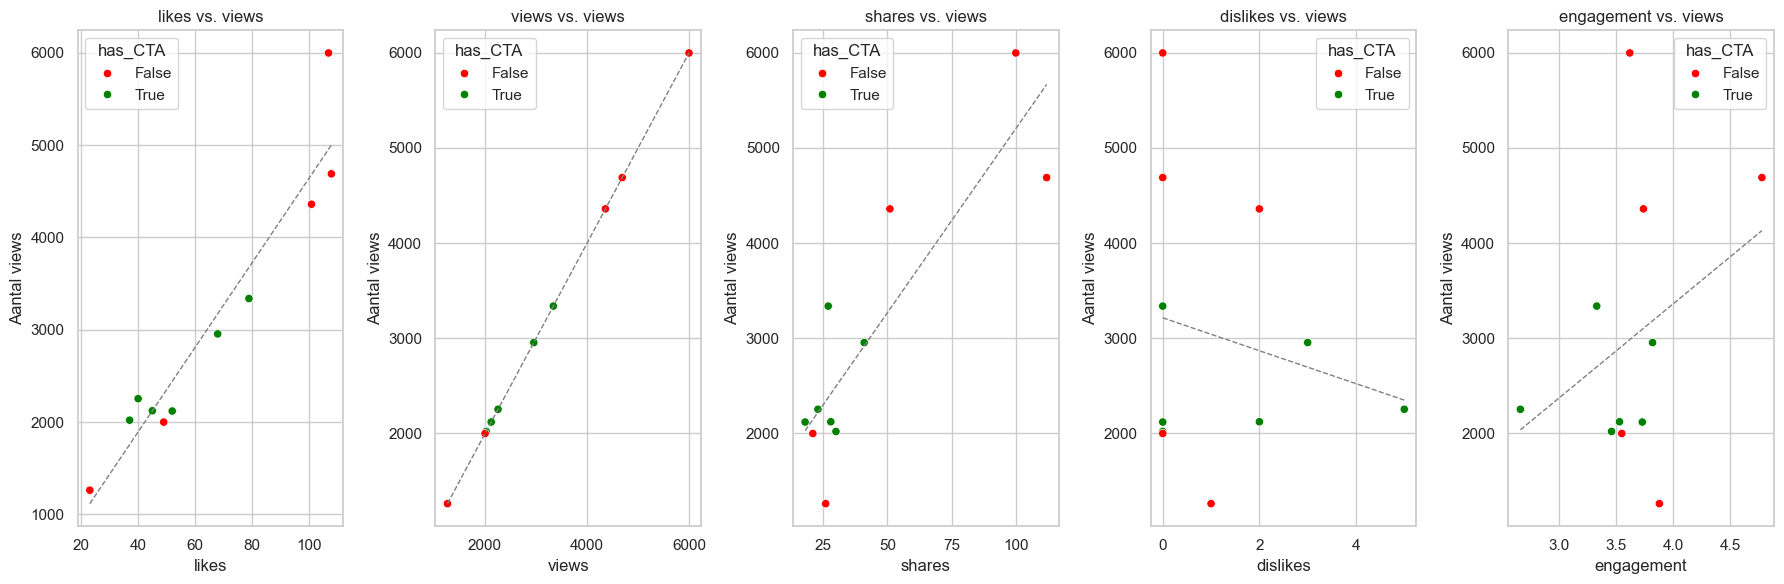

In [152]:
# View patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['views'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['views'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. views')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal views')
plt.tight_layout()
plt.show();

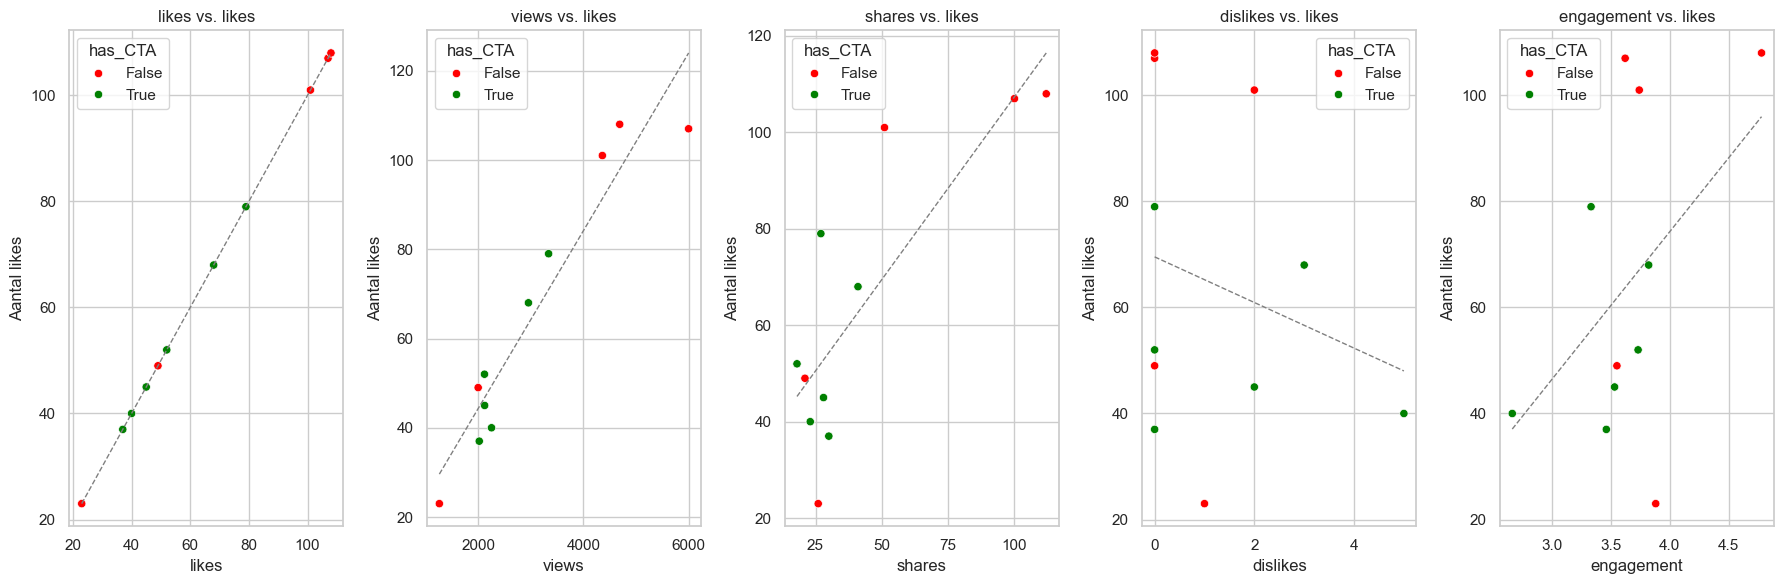

In [153]:
# Like patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['likes'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['likes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. likes')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal likes')
plt.tight_layout()
plt.show();

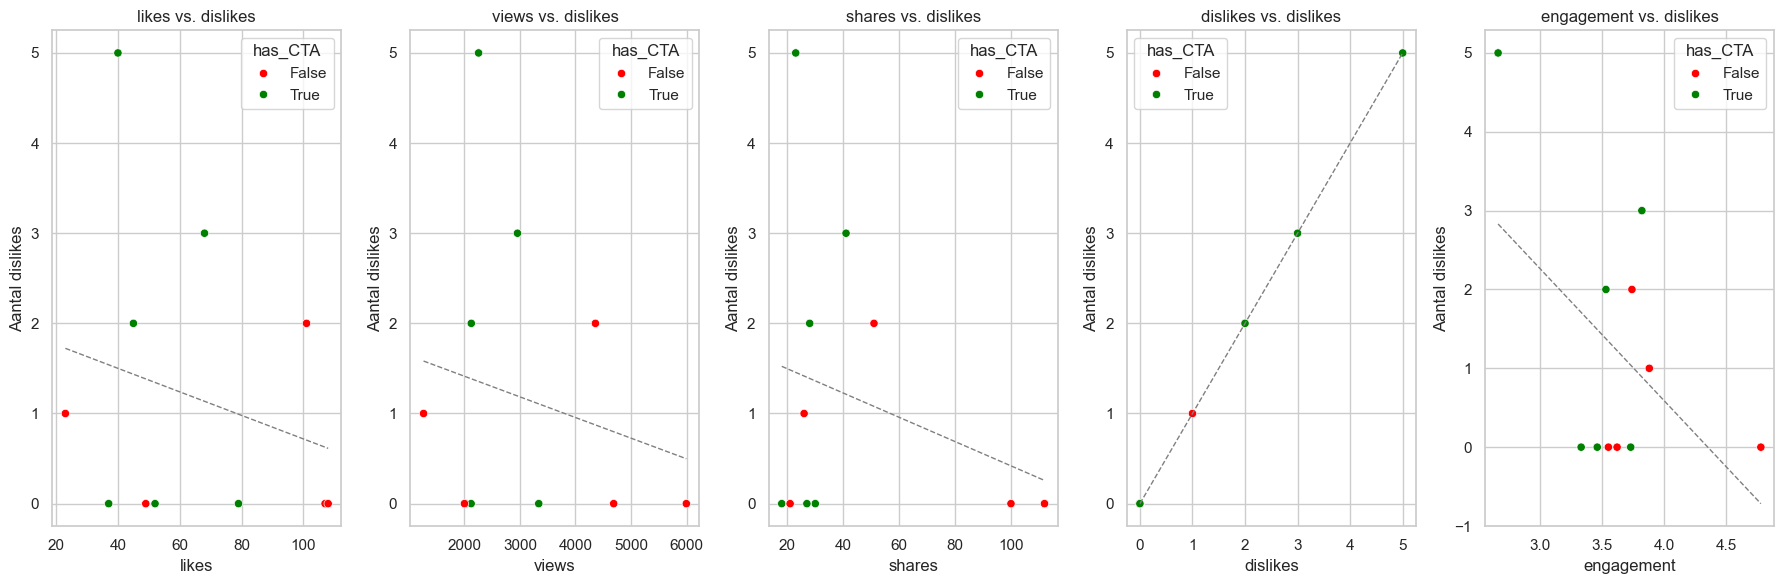

In [154]:
# Dislike patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['dislikes'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['dislikes'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. dislikes')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal dislikes')
plt.tight_layout()
plt.show();

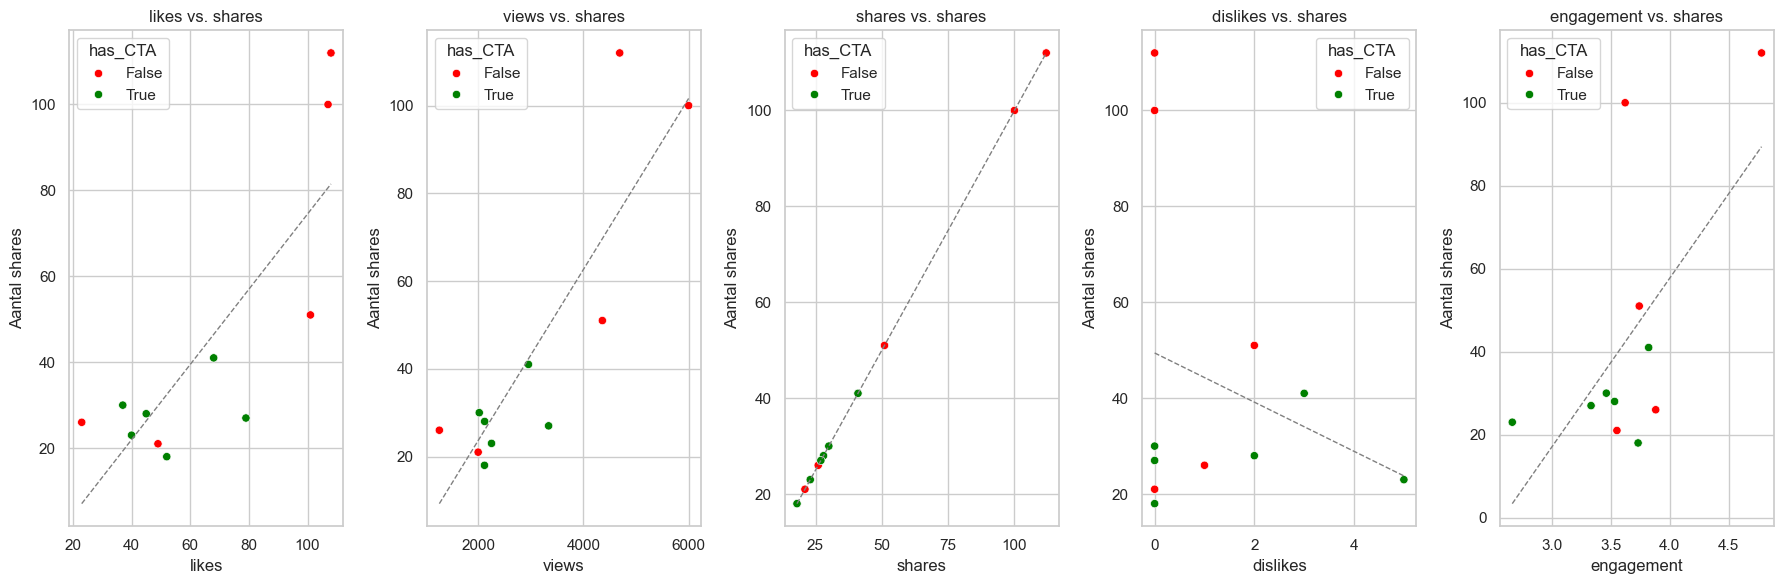

In [155]:
# Share patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['shares'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['shares'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. shares')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Aantal shares')
plt.tight_layout()
plt.show();

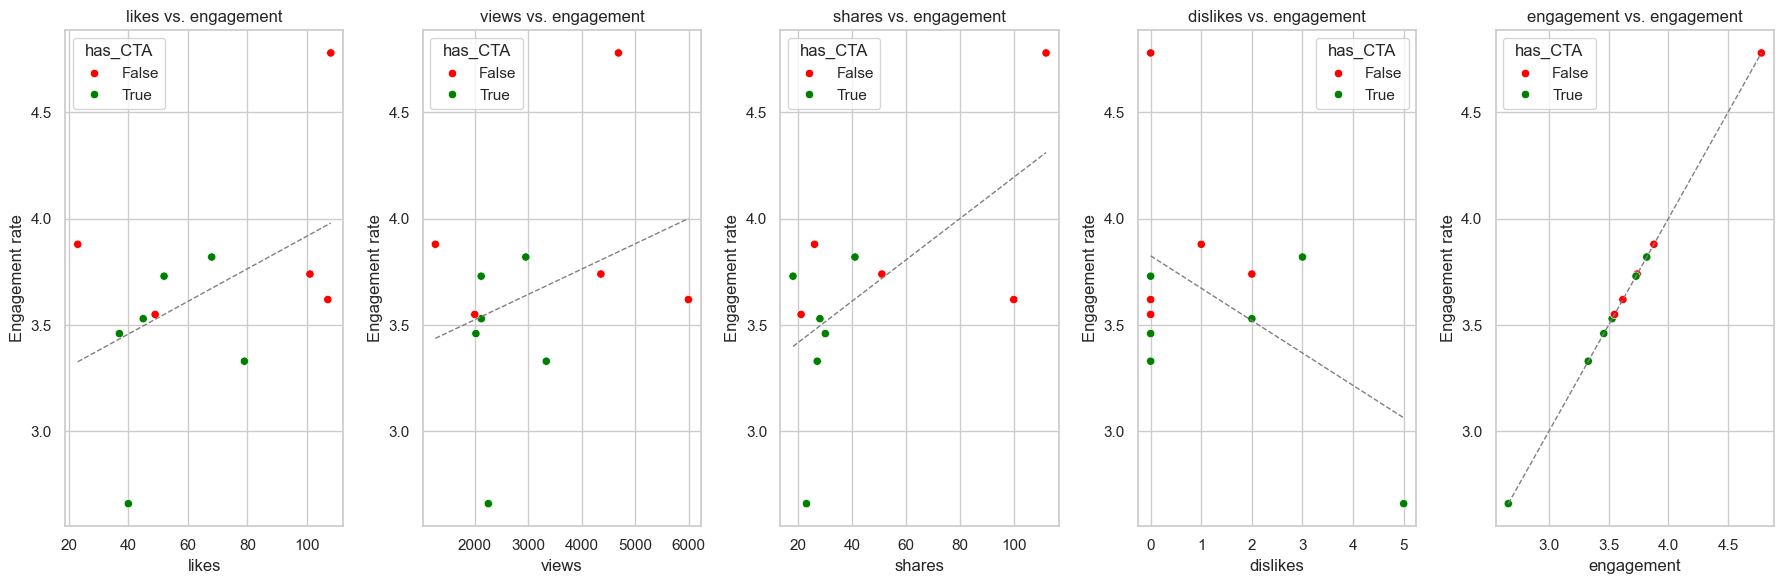

In [156]:
# Engagement patterns
fig, axes = plt.subplots(1, len(metrics), figsize=(18, 6))
for i, metric in enumerate(metrics):
    sns.scatterplot(x=exp_videos[metric], y=exp_videos['engagement'], hue=exp_videos['has_CTA'], palette={False: 'red', True: 'green'}, ax=axes[i])
    sns.regplot(x=exp_videos[metric], y=exp_videos['engagement'], ax=axes[i], scatter=False, color='gray', ci=None, line_kws={'linestyle': 'dashed', 'linewidth': 1})
    axes[i].set_title(f'{metric} vs. engagement')
    axes[i].set_xlabel(metric)
    axes[i].set_ylabel('Engagement rate')
plt.tight_layout()
plt.show();

## Normaal verdeling

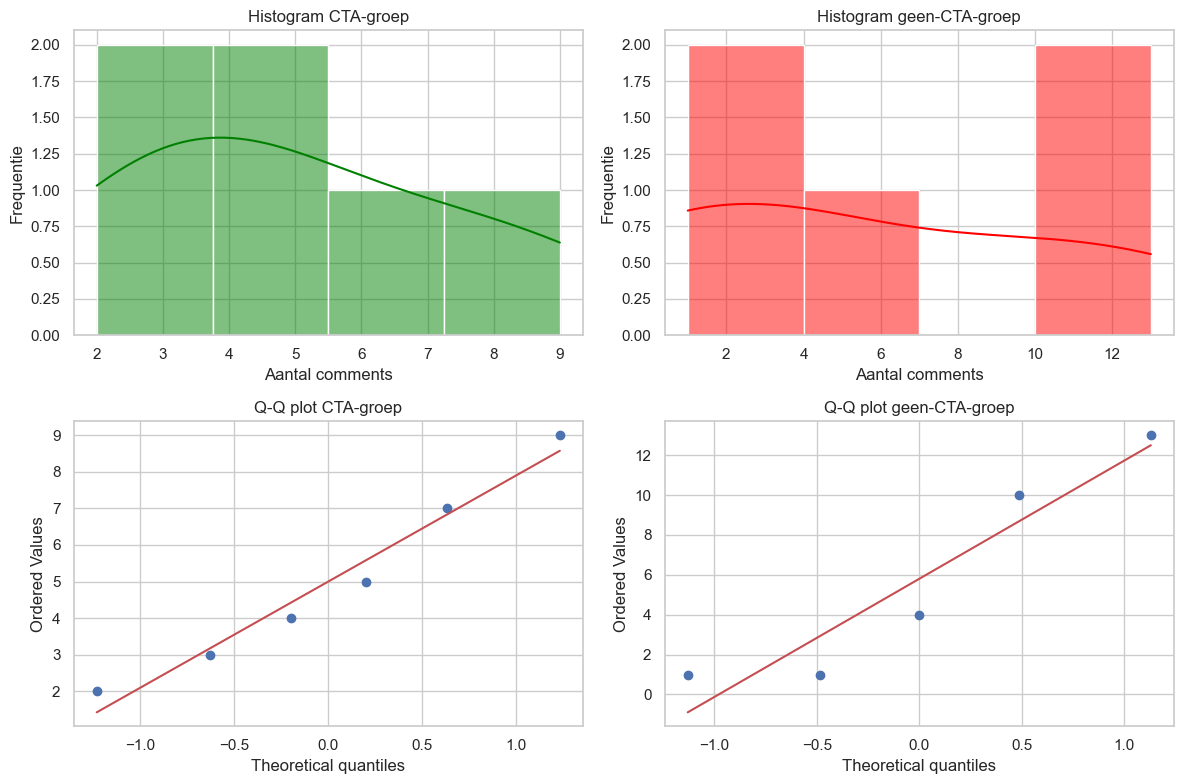

In [139]:
# Split the data
cta_comments = exp_videos[exp_videos['has_CTA'] == True]['comments']
no_cta_comments = exp_videos[exp_videos['has_CTA'] == False]['comments']

# Set up figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histogram CTA
sns.histplot(cta_comments, kde=True, ax=axes[0, 0], color='green')
axes[0, 0].set_title('Histogram CTA-groep')
axes[0, 0].set_xlabel('Aantal comments')
axes[0, 0].set_ylabel('Frequentie')

# Histogram no CTA
sns.histplot(no_cta_comments, kde=True, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Histogram geen-CTA-groep')
axes[0, 1].set_xlabel('Aantal comments')
axes[0, 1].set_ylabel('Frequentie')

# Q-Q plot CTA
stats.probplot(cta_comments, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title('Q-Q plot CTA-groep')

# Q-Q plot geen CTA
stats.probplot(no_cta_comments, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q plot geen-CTA-groep')

plt.tight_layout()
plt.show();

In [140]:
# =============================
# Shapiro-Wilk test
# =============================

# Shapiro-Wilk test CTA-groep
shapiro_cta = stats.shapiro(cta_comments)
print('CTA groep - Shapiro-Wilk test:')
print(f'Statistic={shapiro_cta.statistic:.4f}, p-value={shapiro_cta.pvalue:.4f}')
if shapiro_cta.pvalue < 0.05:
    print("Interpretatie: De data wijkt significant af van een normale verdeling (p < 0.05).")
else:
    print("Interpretatie: Er is geen significante afwijking van een normale verdeling (p ≥ 0.05).")

# Shapiro-Wilk test geen CTA-groep
shapiro_no_cta = stats.shapiro(no_cta_comments)
print('\nGeen CTA groep - Shapiro-Wilk test:')
print(f'Statistic={shapiro_no_cta.statistic:.4f}, p-value={shapiro_no_cta.pvalue:.4f}')
if shapiro_no_cta.pvalue < 0.05:
    print("Interpretatie: De data wijkt significant af van een normale verdeling (p < 0.05).")
else:
    print("Interpretatie: Er is geen significante afwijking van een normale verdeling (p ≥ 0.05).")

CTA groep - Shapiro-Wilk test:
Statistic=0.9596, p-value=0.8165
Interpretatie: Er is geen significante afwijking van een normale verdeling (p ≥ 0.05).

Geen CTA groep - Shapiro-Wilk test:
Statistic=0.8668, p-value=0.2538
Interpretatie: Er is geen significante afwijking van een normale verdeling (p ≥ 0.05).


Allereerst werd de normaliteit van de verdeling gecontroleerd met de Shapiro-Wilk test. Voor de CTA-groep werd een teststatistiek gevonden van **0.9596 (p = .8165)** en voor de geen-CTA-groep een teststatistiek van **0.8668 (p = .2538)**. Beide p-waarden overschrijden de gangbare significantiedrempel van **α = 0.05**, wat betekent dat de nulhypothese van normaliteit niet verworpen kan worden. Met andere woorden, _er is geen significant bewijs dat de verdelingen afwijken van normaliteit_. Visuele inspectie van de histogrammen en Q-Q-plots suggereerde echter dat met name de geen-CTA-groep enige afwijking vertoonde, waardoor voorzichtigheid geboden blijft bij de interpretatie van deze resultaten.

Hoewel de Shapiro-Wilk test voor zowel de CTA- als de geen-CTA-groep geen significante afwijking van normaliteit aantoonde (p ≥ .05), werd ervoor gekozen om de Mann-Whitney U-test toe te passen in plaats van een onafhankelijke t-toets. Daar zijn enkele goed onderbouwde redenen voor:

1.	Kleine steekproefomvang:
Met slechts elf video’s in totaal (en dus nog minder per groep) is de steekproef erg klein. Bij kleine steekproeven (< 30 per groep) zijn normaliteitstests weinig krachtig en kan visuele inspectie (bijvoorbeeld van histogrammen of Q-Q-plots) afwijkingen aan het licht brengen die de Shapiro-Wilk test niet detecteert.

2.	Robuustheid tegen uitbijters:
De Mann-Whitney U-test is minder gevoelig voor uitschieters dan de t-toets. Gezien de heterogeniteit in de aantallen comments per video en de zichtbare scheefheid bij sommige distributies, is een niet-parametrische toets een veiligere keuze.

3.	Beperkte assumpties:
De t-toets vereist naast normaliteit ook homogene varianties (gelijkheid van spreiding), terwijl de Mann-Whitney U-test daar niet gevoelig voor is. Bij kleine steekproeven is het moeilijk om betrouwbaar de homoscedasticiteit te testen, wat een extra argument geeft om een robuustere toets te gebruiken.

Referenties:<br>
Field, A. (2013). Discovering statistics using IBM SPSS statistics (4e ed.). SAGE Publications.<br>
Pallant, J. (2020). SPSS survival manual (7e ed.). McGraw-Hill Education.

## Statistische analyse

In [142]:
# =============================
# Mann-Whitney U-test
# =============================

# Split the data
cta_group = exp_videos[exp_videos['has_CTA'] == True]['comments']
no_cta_group = exp_videos[exp_videos['has_CTA'] == False]['comments']

# Mann-Whitney U-test
u_statistic, p_value = stats.mannwhitneyu(cta_group, no_cta_group, alternative='two-sided')

# Interpretation
print(f"Mann-Whitney U-test:")
print(f"U-statistic = {u_statistic:.4f}, p-value = {p_value:.4f}")

if p_value < 0.05:
    interpretation = "Er is een significant verschil tussen de CTA- en geen-CTA-groep (p < 0,05)."
else:
    interpretation = "Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05)."

print(f"Interpretatie: {interpretation}")

Mann-Whitney U-test:
U-statistic = 15.5000, p-value = 1.0000
Interpretatie: Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05).


Vervolgens werd de Mann-Whitney U-test toegepast om te onderzoeken of er een verschil bestaat tussen de CTA- en geen-CTA-groepen. De analyse leverde een **U-waarde op van 15.5000** met een **p-waarde van 1.0000**. Deze p-waarde ligt ver boven de drempelwaarde van .05, waaruit geconcludeerd kan worden dat er **geen statistisch significant verschil is tussen beide groepen in termen van het aantal gegenereerde comments**. Met andere woorden, het opnemen van een CTA leidde in deze steekproef niet tot een significante toename van de interactie in de vorm van comments.

In [143]:
# =============================
# Cliff's Delta
# =============================


# Comments per groep
cta_comments = exp_videos[exp_videos['has_CTA']]['comments']
geen_cta_comments = exp_videos[~exp_videos['has_CTA']]['comments']

# Bereken Cliff's Delta
delta, size = cliffs_delta(cta_comments, geen_cta_comments)

# Print resultaat met interpretatie
print(f"Cliff's Delta: {delta:.4f}, Effectgrootte: {size}")
interpretatie = (
    "Interpretatie: Hoewel het verschil niet significant was (p ≥ 0,05), "
    f"duidt Cliff's Delta op een {size} effectgrootte."
)
print(interpretatie)

Cliff's Delta: 0.0333, Effectgrootte: negligible
Interpretatie: Hoewel het verschil niet significant was (p ≥ 0,05), duidt Cliff's Delta op een negligible effectgrootte.


Tot slot werd de effectgrootte berekend aan de hand van Cliff’s Delta, waarbij een waarde van **0.0333** werd gevonden. Deze waarde valt binnen de categorie **‘negligible effect size’** (Romano et al., 2006), wat betekent dat het verschil tussen de twee groepen, zelfs indien aanwezig, verwaarloosbaar klein is in praktische termen.

## Interpretatie

Samenvattend tonen de analyses aan dat CTA’s in deze steekproef geen significant effect hadden op het aantal comments. Zowel de frequentieanalyse, de non-parametrische toets als de effectgrootteschatting ondersteunen de conclusie dat CTA’s in deze context geen substantiële bijdrage leverden aan de gebruikersinteractie. Het is echter belangrijk te benadrukken dat de steekproefomvang relatief klein is (n = 11), waardoor de generaliseerbaarheid van deze bevindingen beperkt is. Vervolgonderzoek met een grotere steekproef wordt dan ook aanbevolen om deze resultaten te bevestigen of te nuanceren.

## Extra

In [144]:
metrics = ['likes', 'views', 'shares', 'dislikes', 'engagement']
for metric in metrics:
    cta_group = exp_videos[exp_videos['has_CTA']][metric]
    no_cta_group = exp_videos[~exp_videos['has_CTA']][metric]

    # Mann-Whitney U-test
    u_statistic, p_value = stats.mannwhitneyu(cta_group, no_cta_group, alternative='two-sided')
    print(f"\n{metric.capitalize()} - Mann-Whitney U-test:")
    print(f"U-statistic = {u_statistic:.4f}, p-value = {p_value:.4f}")

    if p_value < 0.05:
        interpretation = "Er is een significant verschil tussen de CTA- en geen-CTA-groep (p < 0,05)."
    else:
        interpretation = "Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05)."
    print(f"Interpretatie: {interpretation}")

    # Cliff's Delta
    delta, size = cliffs_delta(cta_group, no_cta_group)
    print(f"Cliff's Delta: {delta:.4f}, Effectgrootte: {size}")


Likes - Mann-Whitney U-test:
U-statistic = 9.0000, p-value = 0.3290
Interpretatie: Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05).
Cliff's Delta: -0.4000, Effectgrootte: medium

Views - Mann-Whitney U-test:
U-statistic = 12.0000, p-value = 0.6623
Interpretatie: Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05).
Cliff's Delta: -0.2000, Effectgrootte: small

Shares - Mann-Whitney U-test:
U-statistic = 9.0000, p-value = 0.3290
Interpretatie: Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05).
Cliff's Delta: -0.4000, Effectgrootte: medium

Dislikes - Mann-Whitney U-test:
U-statistic = 19.0000, p-value = 0.4847
Interpretatie: Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05).
Cliff's Delta: 0.2667, Effectgrootte: small

Engagement - Mann-Whitney U-test:
U-statistic = 5.0000, p-value = 0.0823
Interpretatie: Er is geen significant verschil tussen de CTA- en geen-CTA-groep (p ≥ 0,05).
Cli

In [148]:
# Control variables
# TODO: use the matrix here!
controlevariabelen = [col for col in ['topic', 'speaker_gender', 'university', 'ambassador', 'publish_date'] if col in exp_videos.columns]

for var in controlevariabelen:
    cross_tab = pd.crosstab(exp_videos[var], exp_videos['has_CTA'])
    print(f"\nVerdeling {var} per CTA:")
    print(cross_tab)


Verdeling university per CTA:
has_CTA     False  True 
university              
KUL             1      0
UA              1      2
UG              2      2
VUB             1      2

Verdeling publish_date per CTA:
has_CTA               False  True 
publish_date                      
2024-12-01T07:00:09Z      1      0
2024-12-08T09:00:27Z      0      1
2024-12-10T06:00:16Z      0      1
2024-12-15T09:00:48Z      1      0
2024-12-17T09:00:40Z      0      1
2024-12-22T08:00:08Z      0      1
2024-12-24T08:00:38Z      1      0
2024-12-29T09:00:28Z      1      0
2024-12-31T09:00:04Z      0      1
2025-01-05T09:00:22Z      1      0
2025-01-19T09:00:02Z      0      1
